In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from clustring_functions import (find_optimal_k_and_cluster, _palette_from_dataset, run_kmeans_on_pca_data,
                                     _cmap_for_dataset,build_cluster_summary)
import os, random, numpy as np

import re
from viz_diff_map import (plot_distance_heatmap_from_csv,reorder_distance_matrix_by_clusters)

In [2]:
SEED = 17

os.environ["PYTHONHASHSEED"] = str(SEED)  # hashes (rarely matters)
random.seed(SEED)  # Python’s RNG
np.random.seed(SEED)  # NumPy RNG


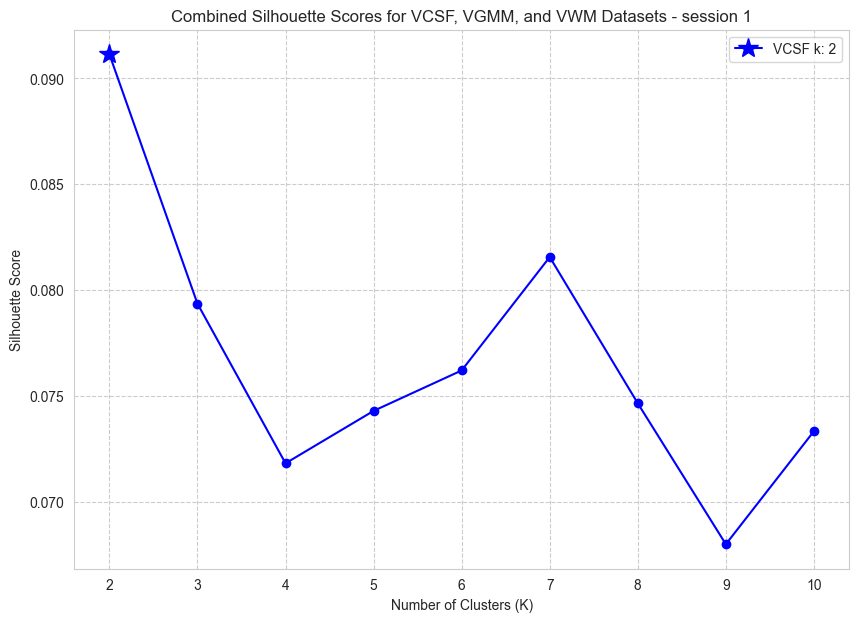

In [3]:

pattern = r"^DC\d+$"
diff_map_ses1 = pd.read_csv("data/SCHAEFER_mat_cor/csv_out/diffusion_map_ses1_labeled.csv",index_col=0)
comp_cols = [c for c in diff_map_ses1.columns if re.match(pattern, str(c))]
diff_map_ses1= diff_map_ses1.loc[:, comp_cols[:12]]
# --- קריאה לפונקציה ושמירת תוצאות ---
results_diff_map_ses1 = find_optimal_k_and_cluster(pca_df=diff_map_ses1,random_state=SEED)

# --- Create the combined plot ---
plt.figure(figsize=(10, 7))

# קווי הסילואט (ללא שינוי משמעותי)
plt.plot(results_diff_map_ses1['k_values'], results_diff_map_ses1['silhouette_scores'], marker='o', color='blue')

# # --- סימון k האופטימלי ---
best_k_diff_map_score_ses1 = results_diff_map_ses1['silhouette_scores'][
    results_diff_map_ses1['k_values'].index(results_diff_map_ses1['best_k'])]


star_diff_map_ses1, = plt.plot(results_diff_map_ses1['best_k'], best_k_diff_map_score_ses1 ,
                           marker='*', markersize=15, color='blue',
                           label=f'VCSF k: {results_diff_map_ses1["best_k"]}')

plt.title('Combined Silhouette Scores for VCSF, VGMM, and VWM Datasets - session 1')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True, linestyle='--')

# מקרא רק עם שלושת הכוכבים
plt.legend(handles=[star_diff_map_ses1])
plt.show()


Running K-Means on VCSF PCA data...
Cluster assignments saved to data/SCHAEFER_mat_cor/csv_out/diff_map_clusters_ses1.csv


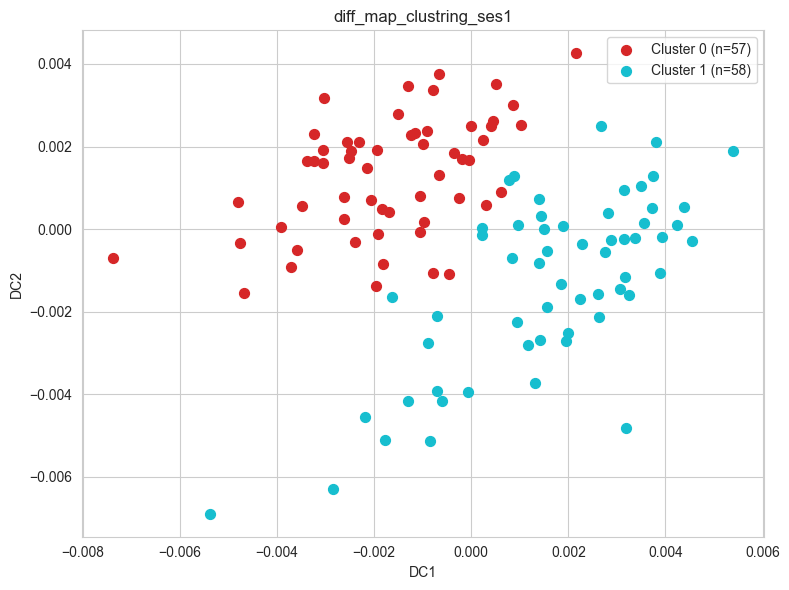

In [4]:
#
print("Running K-Means on VCSF PCA data...")
diff_map_labels_ses1, diff_map_kmeans_ses1, diff_map_pca_clustered_ses1 = run_kmeans_on_pca_data(
    diff_map_ses1,
    k=results_diff_map_ses1["best_k"],
    title="diff_map_clustring_ses1",
    csv_path="data/SCHAEFER_mat_cor/csv_out/diff_map_clusters_ses1.csv",
    dataset_name="connectivity",random_state=SEED
)


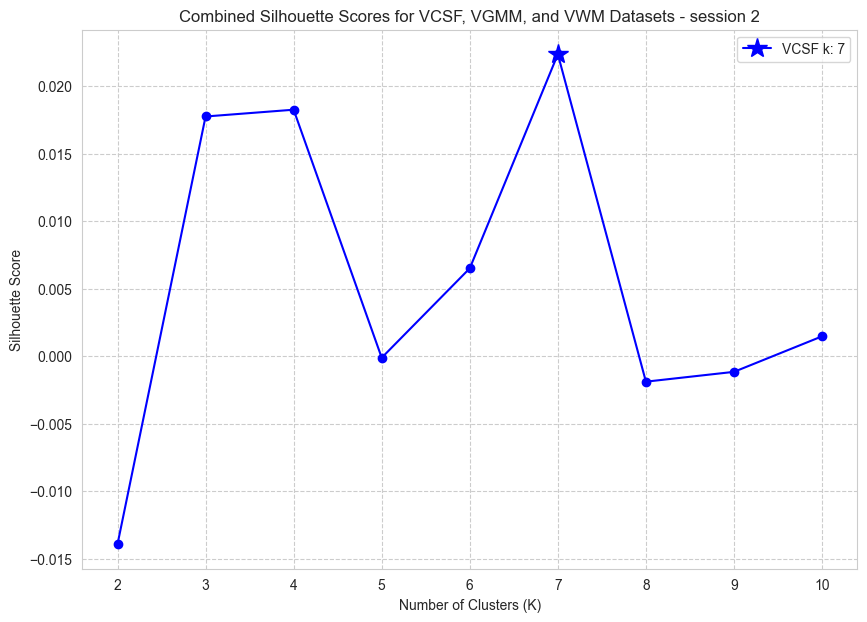

In [5]:

diff_map_ses2 = pd.read_csv("data/SCHAEFER_mat_cor/csv_out/diffusion_map_ses2_labeled.csv",index_col=0)
comp_cols = [c for c in diff_map_ses2.columns if re.match(pattern, str(c))]
diff_map_ses2= diff_map_ses2.loc[:, comp_cols[:18]]
# --- קריאה לפונקציה ושמירת תוצאות ---
results_diff_map_ses2 = find_optimal_k_and_cluster(pca_df=diff_map_ses2,random_state=SEED)


# --- Create the combined plot ---
plt.figure(figsize=(10, 7))

# קווי הסילואט (ללא שינוי משמעותי)
plt.plot(results_diff_map_ses2['k_values'], results_diff_map_ses2['silhouette_scores'], marker='o', color='blue')

# # --- סימון k האופטימלי ---
best_k_diff_map_score_ses2 = results_diff_map_ses2['silhouette_scores'][
    results_diff_map_ses2['k_values'].index(results_diff_map_ses2['best_k'])]


star_diff_map_ses2, = plt.plot(results_diff_map_ses2['best_k'], best_k_diff_map_score_ses2 ,
                           marker='*', markersize=15, color='blue',
                           label=f'VCSF k: {results_diff_map_ses2["best_k"]}')

plt.title('Combined Silhouette Scores for VCSF, VGMM, and VWM Datasets - session 2')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True, linestyle='--')

# מקרא רק עם שלושת הכוכבים
plt.legend(handles=[star_diff_map_ses2])
plt.show()

Running K-Means on VCSF PCA data...
Cluster assignments saved to data/SCHAEFER_mat_cor/csv_out/diff_map_clusters_ses2.csv


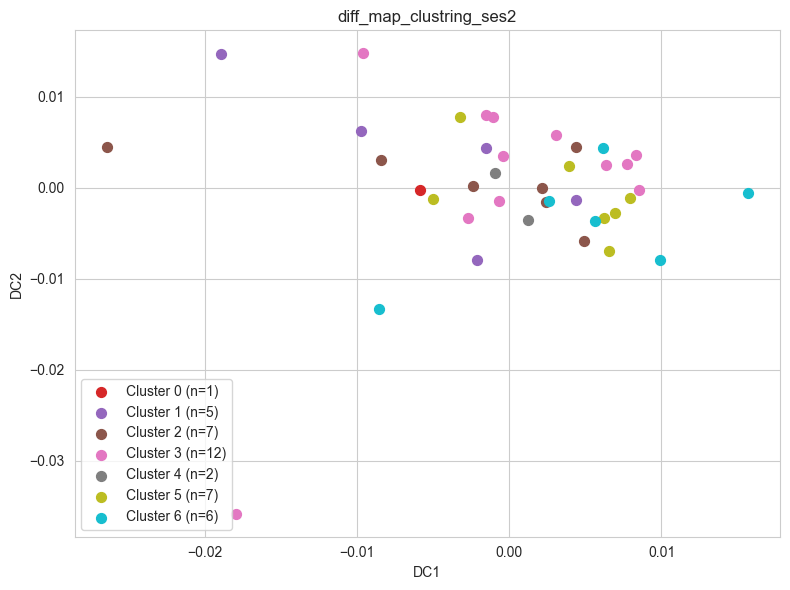

In [6]:
# ###############################################################
# # session 2
#
print("Running K-Means on VCSF PCA data...")
diff_map_labels_ses2, diff_map_kmeans_ses2, diff_map_pca_clustered_ses2 = run_kmeans_on_pca_data(
    diff_map_ses2,
    k=results_diff_map_ses2["best_k"],
    csv_path="data/SCHAEFER_mat_cor/csv_out/diff_map_clusters_ses2.csv",
    title="diff_map_clustring_ses2",
    dataset_name="connectivity",random_state=SEED
)


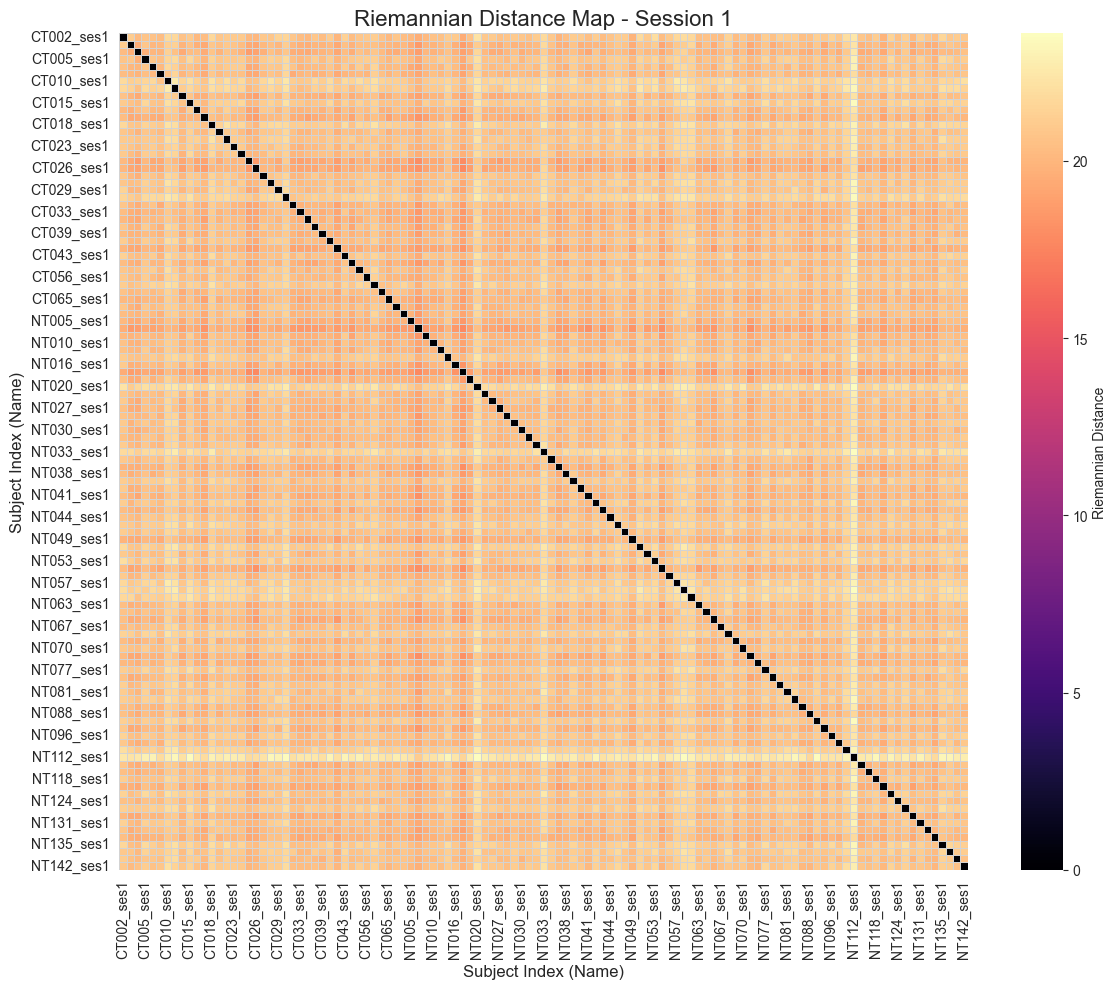

            CT002_ses1  CT005_ses1  CT012_ses1  CT013_ses1  CT020_ses1  \
CT002_ses1    0.000000   20.703337   21.746565   20.556858   20.803916   
CT005_ses1   20.703337    0.000000   21.761604   20.474727   20.814914   
CT012_ses1   21.746565   21.761604    0.000000   21.031169   21.484074   
CT013_ses1   20.556858   20.474727   21.031169    0.000000   20.234082   
CT020_ses1   20.803916   20.814914   21.484074   20.234082    0.000000   
...                ...         ...         ...         ...         ...   
NT096_ses1   21.389035   21.109033   21.365631   20.765418   21.177993   
NT112_ses1   22.428308   22.932852   23.293533   22.188969   22.525509   
NT121_ses1   21.465009   21.762031   21.711165   21.160677   21.279177   
NT132_ses1   20.747808   20.481020   21.147560   20.104195   20.847530   
NT137_ses1   20.845335   21.409813   21.765378   20.319168   20.526164   

            CT021_ses1  CT023_ses1  CT024_ses1  CT027_ses1  CT028_ses1  ...  \
CT002_ses1   20.929296   20.9752

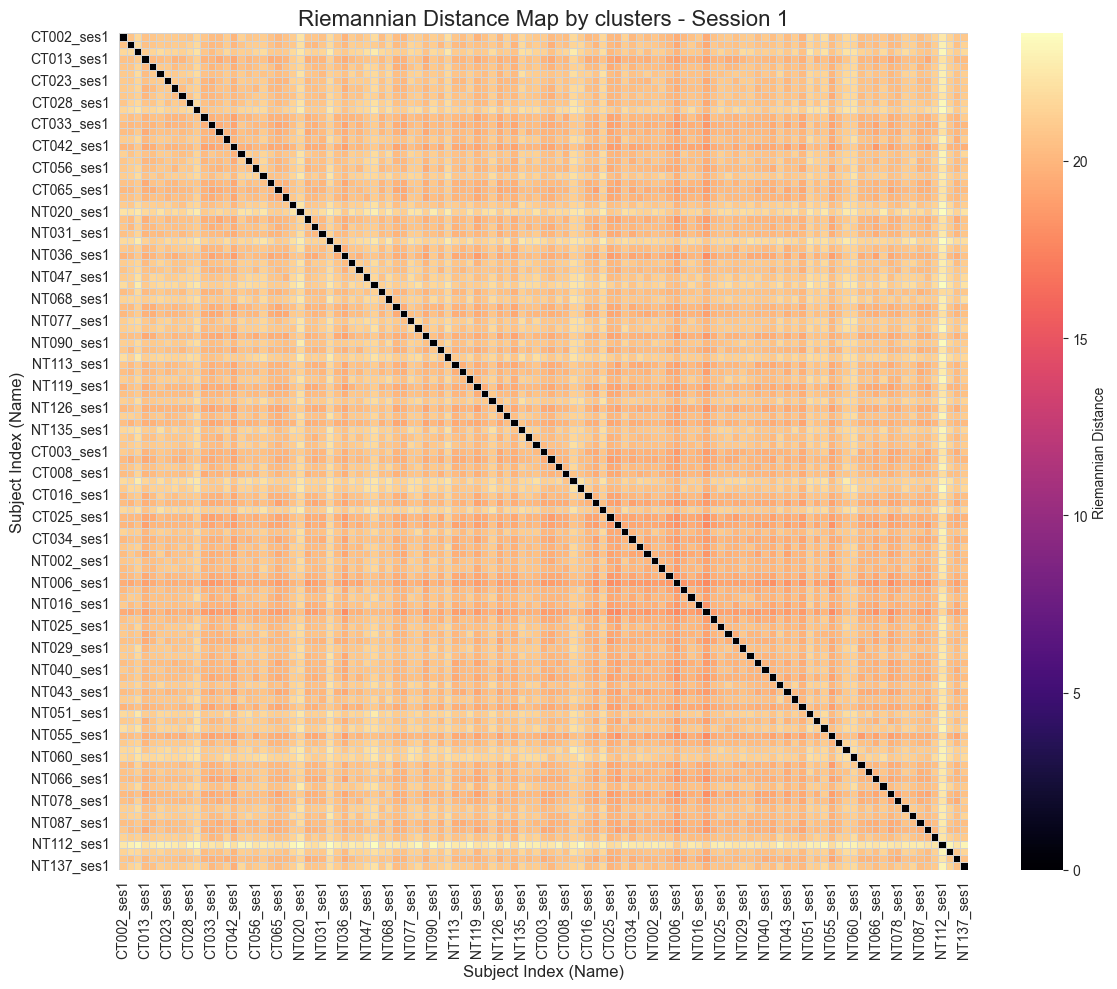

In [7]:
session1_distances= pd.read_csv('data/SCHAEFER_mat_cor/csv_out/diffusion_distances_ses1_labeled.csv',index_col =0 )

plot_distance_heatmap_from_csv(session1_distances,
                                title="Riemannian Distance Map - Session 1")




session1_reorder = reorder_distance_matrix_by_clusters('data/SCHAEFER_mat_cor/csv_out/diffusion_distances_ses1_labeled.csv','data/SCHAEFER_mat_cor/csv_out/diff_map_clusters_ses1.csv')


plot_distance_heatmap_from_csv(session1_reorder,
                               title="Riemannian Distance Map by clusters - Session 1")



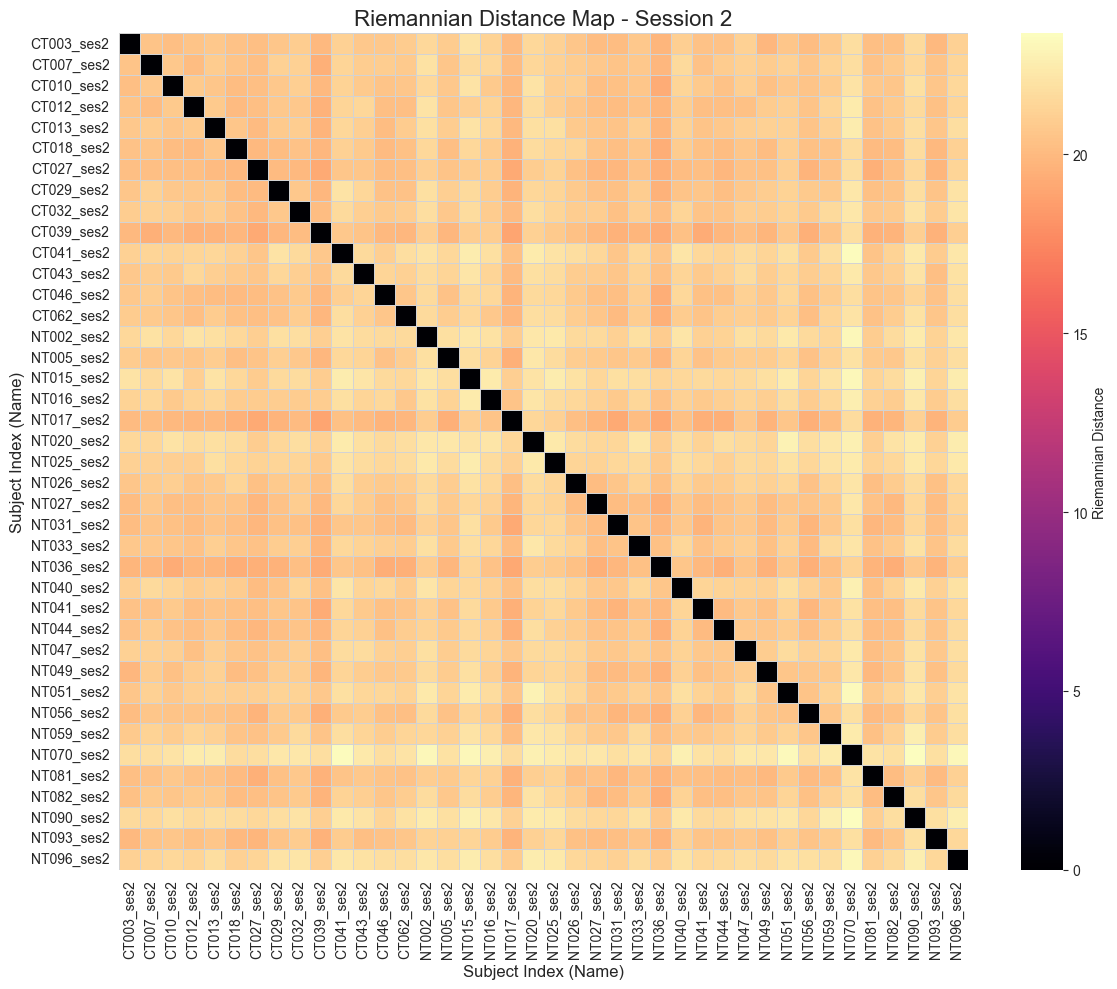

            NT090_ses2  CT007_ses2  CT012_ses2  CT018_ses2  NT015_ses2  \
NT090_ses2    0.000000   21.480518   21.560860   21.660235   22.731246   
CT007_ses2   21.480518    0.000000   20.147593   20.463321   21.585130   
CT012_ses2   21.560860   20.147593    0.000000   20.031786   21.042089   
CT018_ses2   21.660235   20.463321   20.031786    0.000000   21.531179   
NT015_ses2   22.731246   21.585130   21.042089   21.531179    0.000000   
NT047_ses2   21.944904   21.109083   20.296075   20.602436   21.568693   
CT032_ses2   22.050519   21.131784   20.723808   20.430314   21.693598   
CT039_ses2   21.040165   19.483943   19.574101   19.845100   20.938019   
NT002_ses2   22.395515   21.959491   22.061088   21.531825   22.255209   
NT005_ses2   21.902095   20.556350   20.627983   20.247657   21.766401   
NT020_ses2   22.439444   21.455434   21.671530   21.712361   22.090504   
NT041_ses2   21.606509   20.392143   20.246282   20.284674   21.588944   
NT044_ses2   21.610307   20.910160   2

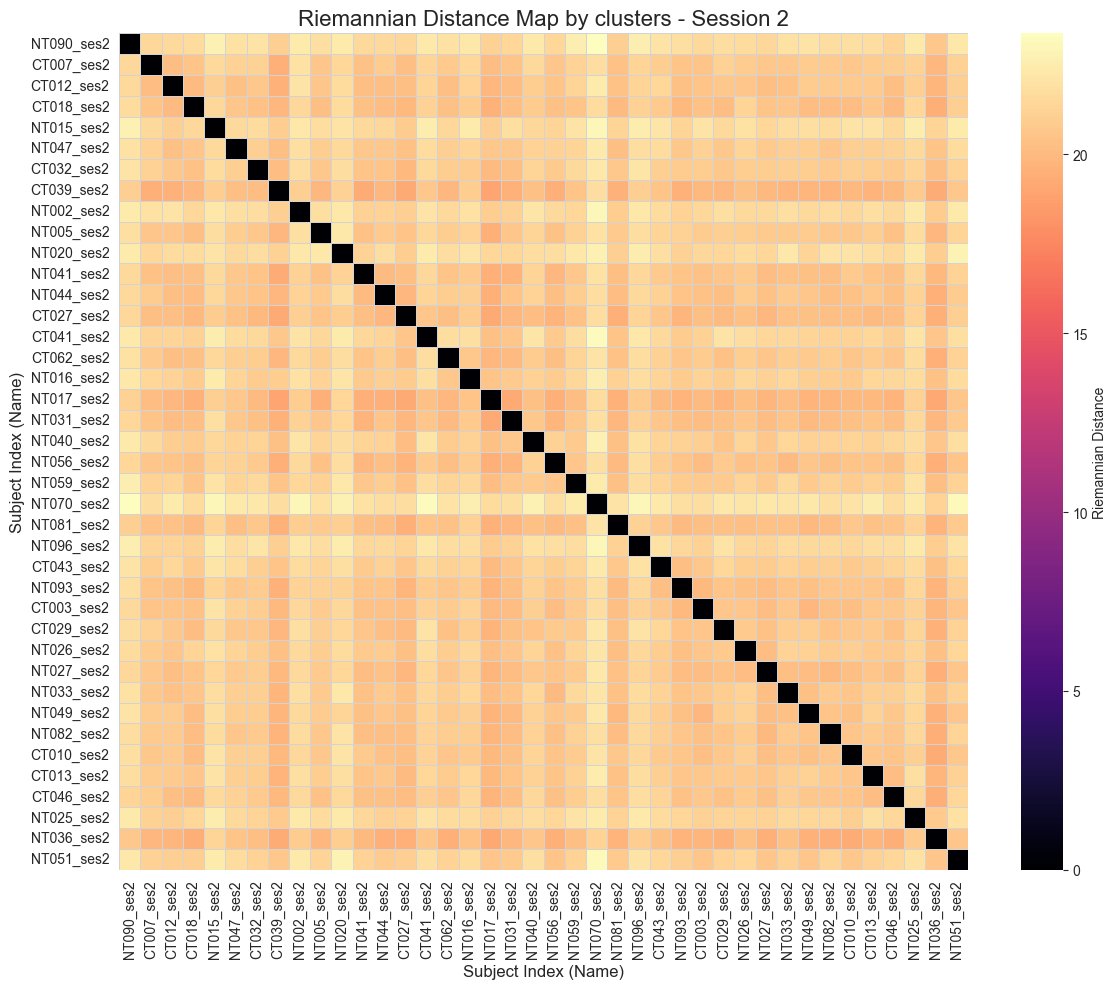

In [8]:
session2_distances= pd.read_csv('data/SCHAEFER_mat_cor/csv_out/diffusion_distances_ses2_labeled.csv',index_col =0 )
plot_distance_heatmap_from_csv(session2_distances,
                                title="Riemannian Distance Map - Session 2")
session2_reorder = reorder_distance_matrix_by_clusters('data/SCHAEFER_mat_cor/csv_out/diffusion_distances_ses2_labeled.csv','data/SCHAEFER_mat_cor/csv_out/diff_map_clusters_ses2.csv')
plot_distance_heatmap_from_csv(session2_reorder,
                               title="Riemannian Distance Map by clusters - Session 2")

#

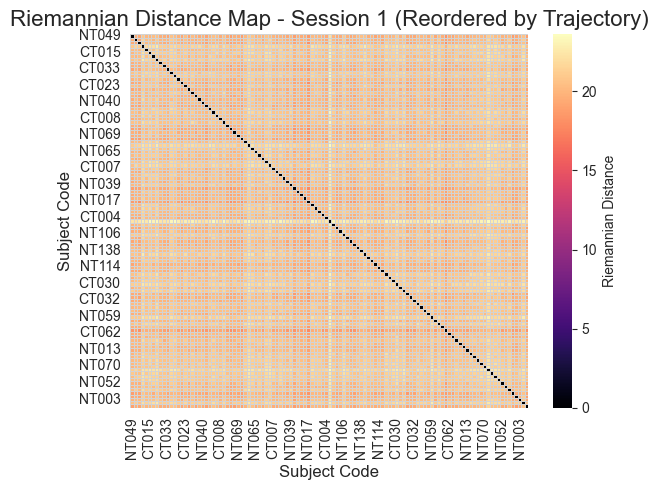

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# נשתמש בפונקציה הקיימת שלך להצגת מפת החום
def plot_distance_heatmap_from_df(df, title="Distance Heatmap", cmap="magma"):
    """
    מציג מפת חום של מטריצת מרחקים נתונה כ-DataFrame.

    Args:
        df (pd.DataFrame): מטריצת המרחקים (המרחקים הריימנים) עם שמות הנבדקים
                             כאינדקס וכותרות עמודות.
        title (str, optional): כותרת הגרף.
        cmap (str, optional): מפת הצבעים לשימוש.
    """
    plt.figure(figsize=(6,5))
    sns.heatmap(df, annot=False, cmap=cmap, fmt=".2f",
                linewidths=.5, linecolor='lightgray',
                cbar_kws={'label': 'Riemannian Distance'})

    plt.title(title, fontsize=16)
    plt.xlabel("Subject Code", fontsize=12)
    plt.ylabel("Subject Code", fontsize=12)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# הפונקציה המבוקשת לסידור המטריצה
def reorder_distance_matrix_by_trajectory(distance_df, trajectory_data_file_path):
    """
    מבצעת סידור מחדש (reordering) למטריצת המרחקים בהתבסס על סדר ה-trajectory
    (הקלאסטרים) מתוך קובץ הנתונים הממוזג.

    Args:
        distance_df (pd.DataFrame): מטריצת המרחקים הריימנים כ-DataFrame.
        trajectory_data_file_path (str): הנתיב לקובץ ה-CSV המכיל את עמודת 'trajectory'.

    Returns:
        pd.DataFrame: מטריצת המרחקים המסודרת מחדש.
    """
    # 1. טעינת נתוני ה-trajectory
    try:
        trajectory_df = pd.read_csv(trajectory_data_file_path, index_col='Subject_Code')
    except Exception as e:
        print(f"Error loading trajectory data: {e}")
        return distance_df # מחזיר את המטריצה המקורית במקרה של כשל

    # 2. סינון והכנת רשימת הנבדקים
    # נשמור רק נבדקים שקיימים גם במטריצת המרחקים וגם בטבלת הנתונים
    common_subjects = list(set(distance_df.index) & set(trajectory_df.index))

    # סינון טבלת ה-trajectory לנבדקים המשותפים בלבד
    trajectory_filtered = trajectory_df.loc[common_subjects]

    # 3. יצירת סדר הנבדקים הרצוי (מיון לפי 'trajectory')
    # ממיין לפי עמודת 'trajectory' (עמודה 34 בנתונים שראיתי)
    # נשתמש במיקום העמודה אם השם המדויק לא 'trajectory' - אך נניח 'trajectory'
    if 'trajectory' in trajectory_filtered.columns:
        # ממיין את הנבדקים לפי ערך ה-trajectory שלהם
        sorted_subjects_df = trajectory_filtered.sort_values(by='trajectory')
    else:
        # אם אין עמודה 'trajectory' ננסה את מיקום העמודה
        print("Warning: 'trajectory' column not found. Attempting to use the last column based on snippet.")
        # זה לא מומלץ, אך אם נצטרך, אפשר לשנות את ה-index לכאן:
        sorted_subjects_df = trajectory_filtered

    sorted_subjects = sorted_subjects_df.index.tolist()

    # 4. סידור מחדש של מטריצת המרחקים
    # נשתמש רק בנבדקים המשותפים

    # נסנן את מטריצת המרחקים כדי לכלול רק נבדקים משותפים
    # ונסדר אותם לפי הסדר החדש שנוצר
    df_reordered = distance_df.loc[sorted_subjects, sorted_subjects]

    return df_reordered

# --- דוגמה לשימוש ---
if __name__ == '__main__':
    # טעינת מטריצת המרחקים הריימנים (קובץ דוגמה)
    distance_file = 'data/SCHAEFER_mat_cor/csv_out/diffusion_distances_ses1_labeled.csv'
    trajectory_file = 'data/only_Q_outputs/5_timepoints/filtered_merged_data_with_trajectory.csv'

    try:
        # טוען את קובץ המרחקים, מניח ששמות הנבדקים נמצאים באינדקס (העמודה הראשונה)
        session1_distances = pd.read_csv(distance_file, index_col=0)

        # מכיוון שה-Subject_Code במטריצת המרחקים הוא בפורמט 'NTxxx_ses1',
        # נשנה אותו ל-'NTxxx' כדי להתאים לקובץ ה-trajectory.
        session1_distances.index = session1_distances.index.str.split('_').str[0]
        session1_distances.columns = session1_distances.columns.str.split('_').str[0]

        # הפעלת פונקציית הסידור
        session1_reordered = reorder_distance_matrix_by_trajectory(
            session1_distances,
            trajectory_data_file_path=trajectory_file
        )

        # הצגת מפת החום המסודרת
        plot_distance_heatmap_from_df(
            session1_reordered,
            title="Riemannian Distance Map - Session 1 (Reordered by Trajectory)"
        )

    except FileNotFoundError:
        print(f"One or more files were not found. Ensure '{distance_file}' and '{trajectory_file}' are in the correct path.")
    except Exception as e:
        print(f"An error occurred during processing: {e}")

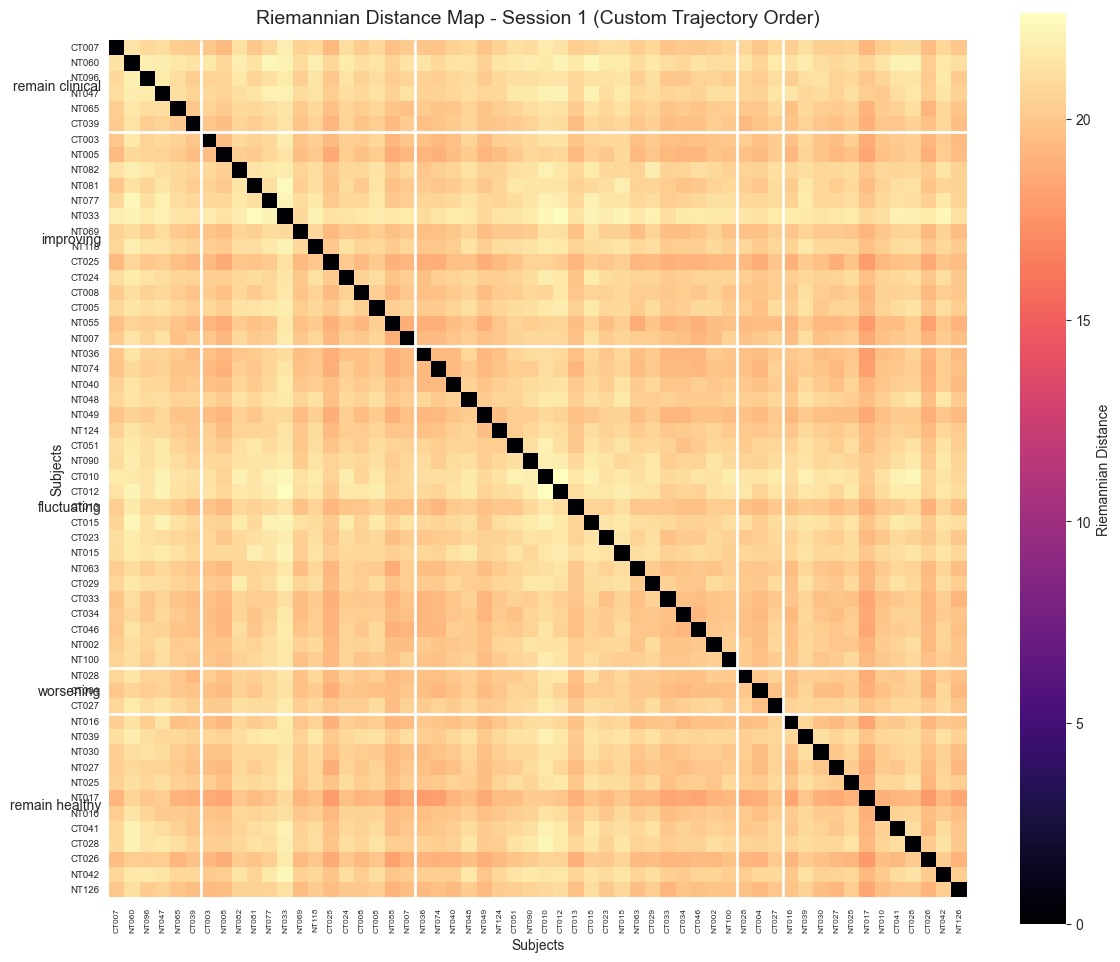

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import re

import re

def norm_label(s: str) -> str:
    """Normalize label text (strip spaces, lowercase, unify underscores/spaces)."""
    if not isinstance(s, str):
        return ""
    s = s.strip().lower()               # trim spaces + lowercase
    s = re.sub(r"[_\s]+", " ", s)       # collapse underscores/spaces → single space
    return s

# ---------------------------------------
# הגדרות בסיס
# ---------------------------------------
CUSTOM_TRAJECTORY_ORDER_RAW = [
    "remain clinical ",  # note the trailing space in your data
    "improving",
    "fluctuating",
    "worsening",
    "remain healthy",
]
CUSTOM_TRAJECTORY_ORDER = [norm_label(x) for x in CUSTOM_TRAJECTORY_ORDER_RAW]

DIST_FILE = "data/SCHAEFER_mat_cor/csv_out/diffusion_distances_ses1_labeled.csv"
TRAJ_FILE = "data/only_Q_outputs/5_timepoints/filtered_merged_data_with_trajectory.csv"

# ---------------------------------------
# פונקציה: סידור המטריצה לפי ה-trajectory
# ---------------------------------------
def reorder_by_trajectory(dist_df, traj_file, order_norm):
    traj_df = pd.read_csv(traj_file)

    # find subject / trajectory columns (case-insensitive)
    subj_col = [c for c in traj_df.columns if "subject" in c.lower()][0]
    traj_col = [c for c in traj_df.columns if "traj" in c.lower()][0]

    # normalize IDs to match (strip _sesX / file suffixes)
    traj_df[subj_col] = traj_df[subj_col].astype(str).str.replace(r"(_ses\d+|\.csv)$", "", regex=True)
    dist_df.index   = dist_df.index.astype(str).str.replace(r"(_ses\d+|\.csv)$", "", regex=True)
    dist_df.columns = dist_df.columns.astype(str).str.replace(r"(_ses\d+|\.csv)$", "", regex=True)

    # --- normalize labels (trailing spaces, case, underscores) ---
    traj_df["traj_norm"] = traj_df[traj_col].astype("string").map(norm_label)

    # keep ONLY labeled subjects present in the normalized order
    keep = traj_df["traj_norm"].isin(order_norm)
    traj_df = traj_df.loc[keep, [subj_col, "traj_norm"]].copy()

    # intersect with subjects in the distance matrix
    common = dist_df.index.intersection(traj_df[subj_col])
    traj_df = traj_df.set_index(subj_col).loc[common]
    dist_df = dist_df.loc[common, common]

    # enforce custom order + sort by it (use normalized labels)
    traj_df["trajectory"] = pd.Categorical(traj_df["traj_norm"],
                                           categories=order_norm,
                                           ordered=True)
    traj_df = traj_df.sort_values("trajectory")

    ordered_subjects = traj_df.index.tolist()
    dist_df = dist_df.loc[ordered_subjects, ordered_subjects]
    return dist_df, traj_df


# ---------------------------------------
# פונקציה: ציור heatmap עם קווים מפרידים
# ---------------------------------------
def plot_heatmap(df, traj_df, title="Riemannian Distance Map", cmap="magma",
                 label_step=1, x_fontsize=6, y_fontsize=7, fillna_value=None):
    plt.figure(figsize=(12, 10))

    # OPTIONAL: get rid of white lines from NaNs
    if fillna_value is not None:
        df = df.fillna(fillna_value)

    # Colors per group (avoid mapping while categorical)
    groups = traj_df["trajectory"].astype(str).dropna().unique()
    palette = sns.color_palette("Set2", len(groups))
    lut = dict(zip(groups, palette))
    row_colors = traj_df["trajectory"].astype(str).map(lut).to_numpy()

    # Heatmap with labels ON
    ax = sns.heatmap(df,
                     cmap=cmap,
                     cbar_kws={"label": "Riemannian Distance"},
                     square=True,
                     xticklabels=True,
                     yticklabels=True,
                     linewidths=0)

    # Separators between groups (work on the same order as traj_df)
    change_idx = np.where(
        traj_df["trajectory"].astype(str).ne(traj_df["trajectory"].astype(str).shift())
    )[0][1:]
    for i in change_idx:
        ax.hlines(i, *ax.get_xlim(), colors="white", lw=2)
        ax.vlines(i, *ax.get_ylim(), colors="white", lw=2)

    # Explicit tick labels from the matrix (ensures correct order)
    ax.set_xticklabels(df.columns, rotation=90, ha="center", fontsize=x_fontsize)
    ax.set_yticklabels(df.index,   rotation=0,  va="center", fontsize=y_fontsize)

    # Optionally thin labels (every n-th) if crowded
    if label_step > 1:
        for i, lab in enumerate(ax.get_xticklabels()):
            lab.set_visible(i % label_step == 0)
        for i, lab in enumerate(ax.get_yticklabels()):
            lab.set_visible(i % label_step == 0)

    # Left-side group labels
    pos = 0
    for g in groups:
        n = int((traj_df["trajectory"].astype(str) == g).sum())
        if n > 0:
            ax.text(-0.5, pos + n/2, g, va="center", ha="right", fontsize=10)
            pos += n

    ax.set_title(title, fontsize=14, pad=12)
    ax.set_xlabel("Subjects")
    ax.set_ylabel("Subjects")
    plt.tight_layout()
    plt.show()


# ---------------------------------------
# הפעלה בפועל
# ---------------------------------------
if __name__ == "__main__":
    dist = pd.read_csv(DIST_FILE, index_col=0)
    dist_reordered, traj_map = reorder_by_trajectory(dist, TRAJ_FILE, CUSTOM_TRAJECTORY_ORDER)
    plot_heatmap(dist_reordered, traj_map, "Riemannian Distance Map - Session 1 (Custom Trajectory Order)")


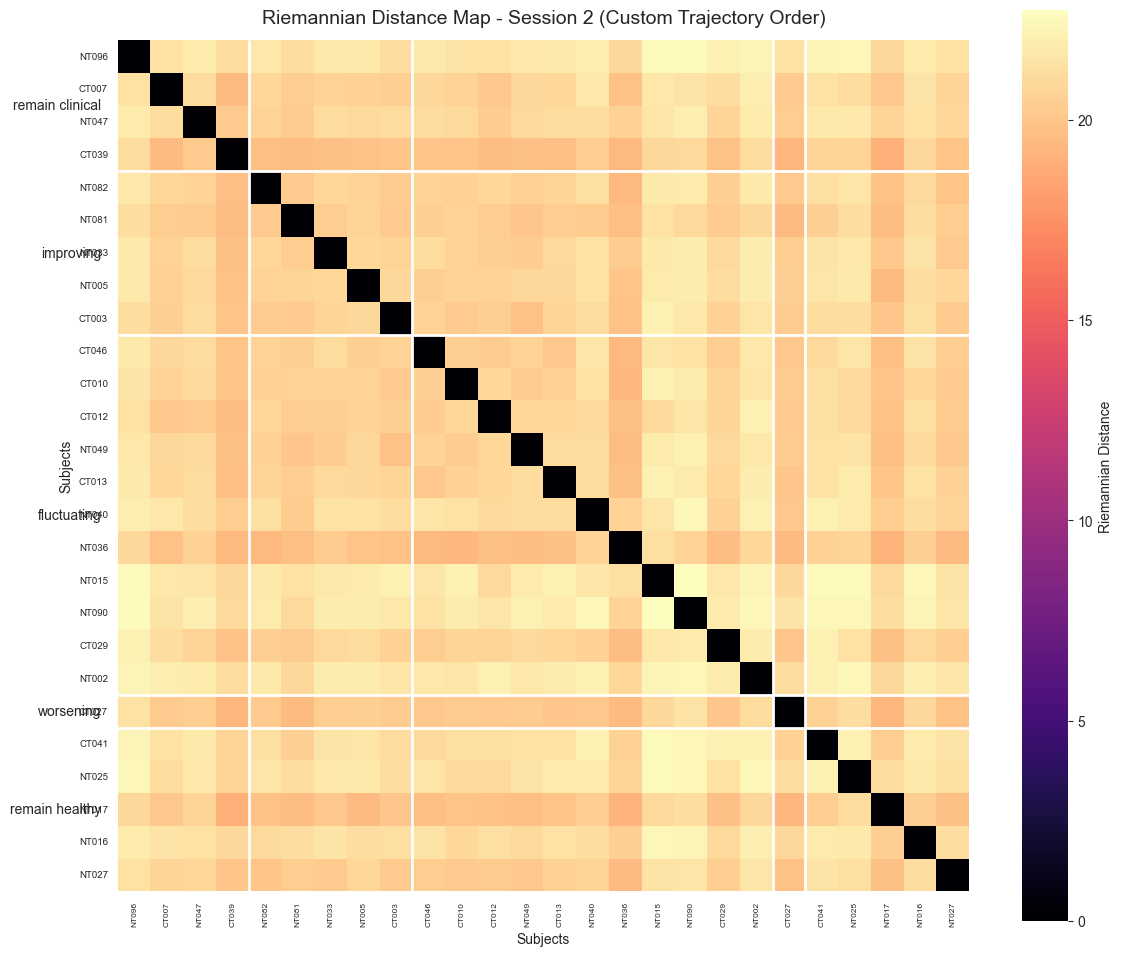

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import re

import re

def norm_label(s: str) -> str:
    """Normalize label text (strip spaces, lowercase, unify underscores/spaces)."""
    if not isinstance(s, str):
        return ""
    s = s.strip().lower()               # trim spaces + lowercase
    s = re.sub(r"[_\s]+", " ", s)       # collapse underscores/spaces → single space
    return s

# ---------------------------------------
# הגדרות בסיס
# ---------------------------------------
CUSTOM_TRAJECTORY_ORDER_RAW = [
    "remain clinical ",  # note the trailing space in your data
    "improving",
    "fluctuating",
    "worsening",
    "remain healthy",
]
CUSTOM_TRAJECTORY_ORDER = [norm_label(x) for x in CUSTOM_TRAJECTORY_ORDER_RAW]

DIST_FILE = "data/SCHAEFER_mat_cor/csv_out/diffusion_distances_ses2_labeled.csv"
TRAJ_FILE = "data/only_Q_outputs/5_timepoints/filtered_merged_data_with_trajectory.csv"

# ---------------------------------------
# פונקציה: סידור המטריצה לפי ה-trajectory
# ---------------------------------------
def reorder_by_trajectory(dist_df, traj_file, order_norm):
    traj_df = pd.read_csv(traj_file)

    # find subject / trajectory columns (case-insensitive)
    subj_col = [c for c in traj_df.columns if "subject" in c.lower()][0]
    traj_col = [c for c in traj_df.columns if "traj" in c.lower()][0]

    # normalize IDs to match (strip _sesX / file suffixes)
    traj_df[subj_col] = traj_df[subj_col].astype(str).str.replace(r"(_ses\d+|\.csv)$", "", regex=True)
    dist_df.index   = dist_df.index.astype(str).str.replace(r"(_ses\d+|\.csv)$", "", regex=True)
    dist_df.columns = dist_df.columns.astype(str).str.replace(r"(_ses\d+|\.csv)$", "", regex=True)

    # --- normalize labels (trailing spaces, case, underscores) ---
    traj_df["traj_norm"] = traj_df[traj_col].astype("string").map(norm_label)

    # keep ONLY labeled subjects present in the normalized order
    keep = traj_df["traj_norm"].isin(order_norm)
    traj_df = traj_df.loc[keep, [subj_col, "traj_norm"]].copy()

    # intersect with subjects in the distance matrix
    common = dist_df.index.intersection(traj_df[subj_col])
    traj_df = traj_df.set_index(subj_col).loc[common]
    dist_df = dist_df.loc[common, common]

    # enforce custom order + sort by it (use normalized labels)
    traj_df["trajectory"] = pd.Categorical(traj_df["traj_norm"],
                                           categories=order_norm,
                                           ordered=True)
    traj_df = traj_df.sort_values("trajectory")

    ordered_subjects = traj_df.index.tolist()
    dist_df = dist_df.loc[ordered_subjects, ordered_subjects]
    return dist_df, traj_df


# ---------------------------------------
# פונקציה: ציור heatmap עם קווים מפרידים
# ---------------------------------------
def plot_heatmap(df, traj_df, title="Riemannian Distance Map", cmap="magma",
                 label_step=1, x_fontsize=6, y_fontsize=7, fillna_value=None):
    plt.figure(figsize=(12, 10))

    # OPTIONAL: get rid of white lines from NaNs
    if fillna_value is not None:
        df = df.fillna(fillna_value)

    # Colors per group (avoid mapping while categorical)
    groups = traj_df["trajectory"].astype(str).dropna().unique()
    palette = sns.color_palette("Set2", len(groups))
    lut = dict(zip(groups, palette))
    row_colors = traj_df["trajectory"].astype(str).map(lut).to_numpy()

    # Heatmap with labels ON
    ax = sns.heatmap(df,
                     cmap=cmap,
                     cbar_kws={"label": "Riemannian Distance"},
                     square=True,
                     xticklabels=True,
                     yticklabels=True,
                     linewidths=0)

    # Separators between groups (work on the same order as traj_df)
    change_idx = np.where(
        traj_df["trajectory"].astype(str).ne(traj_df["trajectory"].astype(str).shift())
    )[0][1:]
    for i in change_idx:
        ax.hlines(i, *ax.get_xlim(), colors="white", lw=2)
        ax.vlines(i, *ax.get_ylim(), colors="white", lw=2)

    # Explicit tick labels from the matrix (ensures correct order)
    ax.set_xticklabels(df.columns, rotation=90, ha="center", fontsize=x_fontsize)
    ax.set_yticklabels(df.index,   rotation=0,  va="center", fontsize=y_fontsize)

    # Optionally thin labels (every n-th) if crowded
    if label_step > 1:
        for i, lab in enumerate(ax.get_xticklabels()):
            lab.set_visible(i % label_step == 0)
        for i, lab in enumerate(ax.get_yticklabels()):
            lab.set_visible(i % label_step == 0)

    # Left-side group labels
    pos = 0
    for g in groups:
        n = int((traj_df["trajectory"].astype(str) == g).sum())
        if n > 0:
            ax.text(-0.5, pos + n/2, g, va="center", ha="right", fontsize=10)
            pos += n

    ax.set_title(title, fontsize=14, pad=12)
    ax.set_xlabel("Subjects")
    ax.set_ylabel("Subjects")
    plt.tight_layout()
    plt.show()


# ---------------------------------------
# הפעלה בפועל
# ---------------------------------------
if __name__ == "__main__":
    dist = pd.read_csv(DIST_FILE, index_col=0)
    dist_reordered, traj_map = reorder_by_trajectory(dist, TRAJ_FILE, CUSTOM_TRAJECTORY_ORDER)
    plot_heatmap(dist_reordered, traj_map, "Riemannian Distance Map - Session 2 (Custom Trajectory Order)")


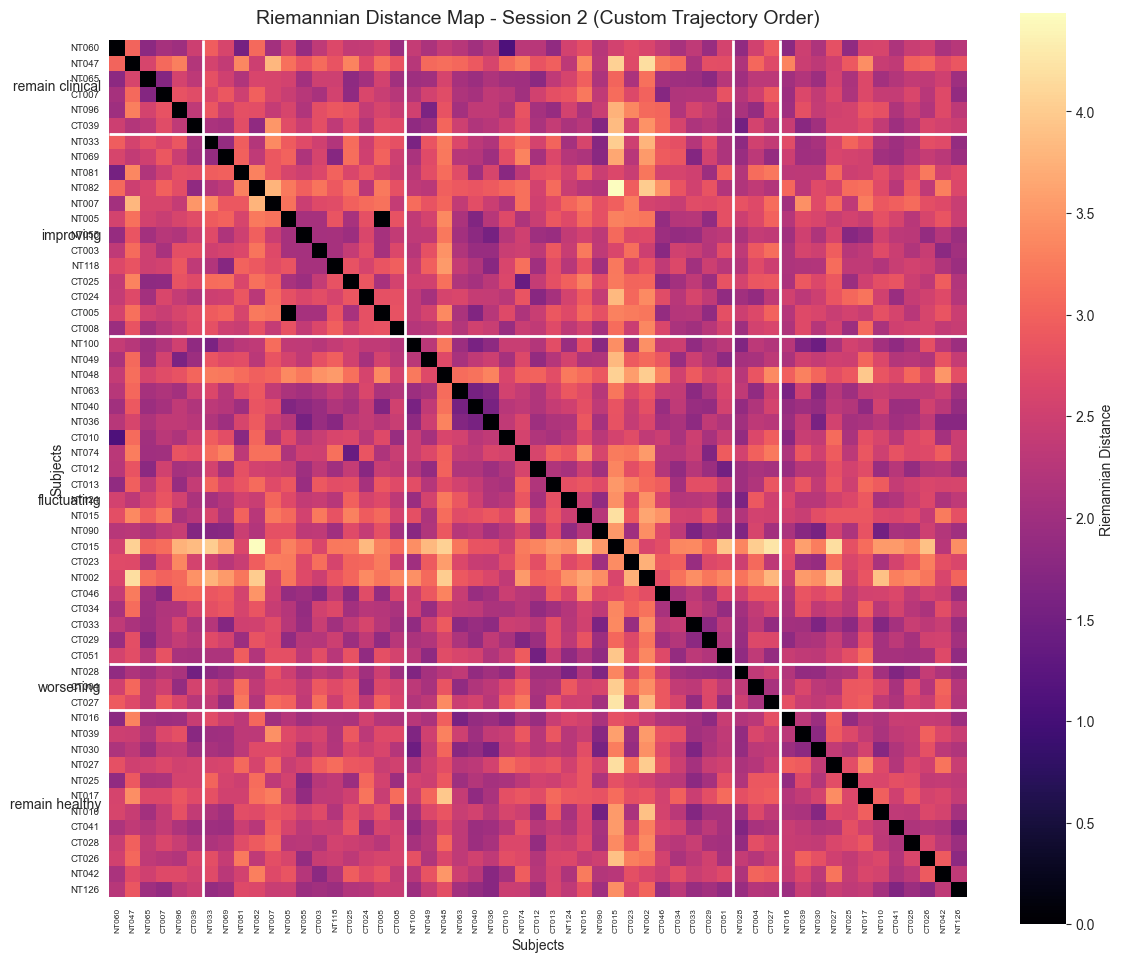

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import re

import re

def norm_label(s: str) -> str:
    """Normalize label text (strip spaces, lowercase, unify underscores/spaces)."""
    if not isinstance(s, str):
        return ""
    s = s.strip().lower()               # trim spaces + lowercase
    s = re.sub(r"[_\s]+", " ", s)       # collapse underscores/spaces → single space
    return s

# ---------------------------------------
# הגדרות בסיס
# ---------------------------------------
CUSTOM_TRAJECTORY_ORDER_RAW = [
    "remain clinical ",  # note the trailing space in your data
    "improving",
    "fluctuating",
    "worsening",
    "remain healthy",
]
CUSTOM_TRAJECTORY_ORDER = [norm_label(x) for x in CUSTOM_TRAJECTORY_ORDER_RAW]

DIST_FILE = "data/YEO_mat_cor/YEO_mat_cor/csv_out/diffusion_distances_ses1_labeled_YEO.csv"
TRAJ_FILE = "data/only_Q_outputs/5_timepoints/filtered_merged_data_with_trajectory.csv"

# ---------------------------------------
# פונקציה: סידור המטריצה לפי ה-trajectory
# ---------------------------------------
def reorder_by_trajectory(dist_df, traj_file, order_norm):
    traj_df = pd.read_csv(traj_file)

    # find subject / trajectory columns (case-insensitive)
    subj_col = [c for c in traj_df.columns if "subject" in c.lower()][0]
    traj_col = [c for c in traj_df.columns if "traj" in c.lower()][0]

    # normalize IDs to match (strip _sesX / file suffixes)
    traj_df[subj_col] = traj_df[subj_col].astype(str).str.replace(r"(_ses\d+|\.csv)$", "", regex=True)
    dist_df.index   = dist_df.index.astype(str).str.replace(r"(_ses\d+|\.csv)$", "", regex=True)
    dist_df.columns = dist_df.columns.astype(str).str.replace(r"(_ses\d+|\.csv)$", "", regex=True)

    # --- normalize labels (trailing spaces, case, underscores) ---
    traj_df["traj_norm"] = traj_df[traj_col].astype("string").map(norm_label)

    # keep ONLY labeled subjects present in the normalized order
    keep = traj_df["traj_norm"].isin(order_norm)
    traj_df = traj_df.loc[keep, [subj_col, "traj_norm"]].copy()

    # intersect with subjects in the distance matrix
    common = dist_df.index.intersection(traj_df[subj_col])
    traj_df = traj_df.set_index(subj_col).loc[common]
    dist_df = dist_df.loc[common, common]

    # enforce custom order + sort by it (use normalized labels)
    traj_df["trajectory"] = pd.Categorical(traj_df["traj_norm"],
                                           categories=order_norm,
                                           ordered=True)
    traj_df = traj_df.sort_values("trajectory")

    ordered_subjects = traj_df.index.tolist()
    dist_df = dist_df.loc[ordered_subjects, ordered_subjects]
    return dist_df, traj_df


# ---------------------------------------
# פונקציה: ציור heatmap עם קווים מפרידים
# ---------------------------------------
def plot_heatmap(df, traj_df, title="Riemannian Distance Map", cmap="magma",
                 label_step=1, x_fontsize=6, y_fontsize=7, fillna_value=None):
    plt.figure(figsize=(12, 10))

    # OPTIONAL: get rid of white lines from NaNs
    if fillna_value is not None:
        df = df.fillna(fillna_value)

    # Colors per group (avoid mapping while categorical)
    groups = traj_df["trajectory"].astype(str).dropna().unique()
    palette = sns.color_palette("Set2", len(groups))
    lut = dict(zip(groups, palette))
    row_colors = traj_df["trajectory"].astype(str).map(lut).to_numpy()

    # Heatmap with labels ON
    ax = sns.heatmap(df,
                     cmap=cmap,
                     cbar_kws={"label": "Riemannian Distance"},
                     square=True,
                     xticklabels=True,
                     yticklabels=True,
                     linewidths=0)

    # Separators between groups (work on the same order as traj_df)
    change_idx = np.where(
        traj_df["trajectory"].astype(str).ne(traj_df["trajectory"].astype(str).shift())
    )[0][1:]
    for i in change_idx:
        ax.hlines(i, *ax.get_xlim(), colors="white", lw=2)
        ax.vlines(i, *ax.get_ylim(), colors="white", lw=2)

    # Explicit tick labels from the matrix (ensures correct order)
    ax.set_xticklabels(df.columns, rotation=90, ha="center", fontsize=x_fontsize)
    ax.set_yticklabels(df.index,   rotation=0,  va="center", fontsize=y_fontsize)

    # Optionally thin labels (every n-th) if crowded
    if label_step > 1:
        for i, lab in enumerate(ax.get_xticklabels()):
            lab.set_visible(i % label_step == 0)
        for i, lab in enumerate(ax.get_yticklabels()):
            lab.set_visible(i % label_step == 0)

    # Left-side group labels
    pos = 0
    for g in groups:
        n = int((traj_df["trajectory"].astype(str) == g).sum())
        if n > 0:
            ax.text(-0.5, pos + n/2, g, va="center", ha="right", fontsize=10)
            pos += n

    ax.set_title(title, fontsize=14, pad=12)
    ax.set_xlabel("Subjects")
    ax.set_ylabel("Subjects")
    plt.tight_layout()
    plt.show()


# ---------------------------------------
# הפעלה בפועל
# ---------------------------------------
if __name__ == "__main__":
    dist = pd.read_csv(DIST_FILE, index_col=0)
    dist_reordered, traj_map = reorder_by_trajectory(dist, TRAJ_FILE, CUSTOM_TRAJECTORY_ORDER)
    plot_heatmap(dist_reordered, traj_map, "Riemannian Distance Map - Session 2 (Custom Trajectory Order)")


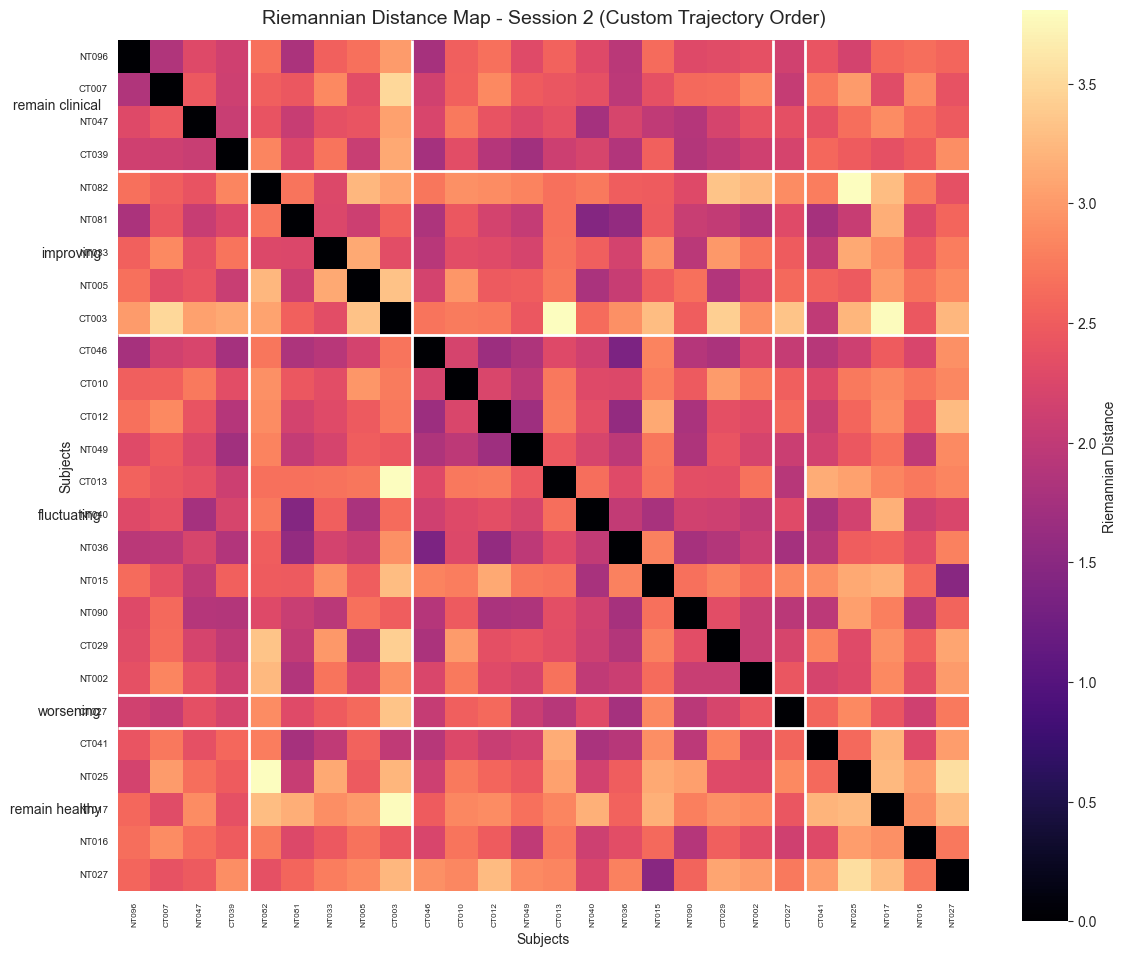

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import re

import re

def norm_label(s: str) -> str:
    """Normalize label text (strip spaces, lowercase, unify underscores/spaces)."""
    if not isinstance(s, str):
        return ""
    s = s.strip().lower()               # trim spaces + lowercase
    s = re.sub(r"[_\s]+", " ", s)       # collapse underscores/spaces → single space
    return s

# ---------------------------------------
# הגדרות בסיס
# ---------------------------------------
CUSTOM_TRAJECTORY_ORDER_RAW = [
    "remain clinical ",  # note the trailing space in your data
    "improving",
    "fluctuating",
    "worsening",
    "remain healthy",
]
CUSTOM_TRAJECTORY_ORDER = [norm_label(x) for x in CUSTOM_TRAJECTORY_ORDER_RAW]

DIST_FILE = "data/YEO_mat_cor/YEO_mat_cor/csv_out/diffusion_distances_ses2_labeled_YEO.csv"
TRAJ_FILE = "data/only_Q_outputs/5_timepoints/filtered_merged_data_with_trajectory.csv"

# ---------------------------------------
# פונקציה: סידור המטריצה לפי ה-trajectory
# ---------------------------------------
def reorder_by_trajectory(dist_df, traj_file, order_norm):
    traj_df = pd.read_csv(traj_file)

    # find subject / trajectory columns (case-insensitive)
    subj_col = [c for c in traj_df.columns if "subject" in c.lower()][0]
    traj_col = [c for c in traj_df.columns if "traj" in c.lower()][0]

    # normalize IDs to match (strip _sesX / file suffixes)
    traj_df[subj_col] = traj_df[subj_col].astype(str).str.replace(r"(_ses\d+|\.csv)$", "", regex=True)
    dist_df.index   = dist_df.index.astype(str).str.replace(r"(_ses\d+|\.csv)$", "", regex=True)
    dist_df.columns = dist_df.columns.astype(str).str.replace(r"(_ses\d+|\.csv)$", "", regex=True)

    # --- normalize labels (trailing spaces, case, underscores) ---
    traj_df["traj_norm"] = traj_df[traj_col].astype("string").map(norm_label)

    # keep ONLY labeled subjects present in the normalized order
    keep = traj_df["traj_norm"].isin(order_norm)
    traj_df = traj_df.loc[keep, [subj_col, "traj_norm"]].copy()

    # intersect with subjects in the distance matrix
    common = dist_df.index.intersection(traj_df[subj_col])
    traj_df = traj_df.set_index(subj_col).loc[common]
    dist_df = dist_df.loc[common, common]

    # enforce custom order + sort by it (use normalized labels)
    traj_df["trajectory"] = pd.Categorical(traj_df["traj_norm"],
                                           categories=order_norm,
                                           ordered=True)
    traj_df = traj_df.sort_values("trajectory")

    ordered_subjects = traj_df.index.tolist()
    dist_df = dist_df.loc[ordered_subjects, ordered_subjects]
    return dist_df, traj_df


# ---------------------------------------
# פונקציה: ציור heatmap עם קווים מפרידים
# ---------------------------------------
def plot_heatmap(df, traj_df, title="Riemannian Distance Map", cmap="magma",
                 label_step=1, x_fontsize=6, y_fontsize=7, fillna_value=None):
    plt.figure(figsize=(12, 10))

    # OPTIONAL: get rid of white lines from NaNs
    if fillna_value is not None:
        df = df.fillna(fillna_value)

    # Colors per group (avoid mapping while categorical)
    groups = traj_df["trajectory"].astype(str).dropna().unique()
    palette = sns.color_palette("Set2", len(groups))
    lut = dict(zip(groups, palette))
    row_colors = traj_df["trajectory"].astype(str).map(lut).to_numpy()

    # Heatmap with labels ON
    ax = sns.heatmap(df,
                     cmap=cmap,
                     cbar_kws={"label": "Riemannian Distance"},
                     square=True,
                     xticklabels=True,
                     yticklabels=True,
                     linewidths=0)

    # Separators between groups (work on the same order as traj_df)
    change_idx = np.where(
        traj_df["trajectory"].astype(str).ne(traj_df["trajectory"].astype(str).shift())
    )[0][1:]
    for i in change_idx:
        ax.hlines(i, *ax.get_xlim(), colors="white", lw=2)
        ax.vlines(i, *ax.get_ylim(), colors="white", lw=2)

    # Explicit tick labels from the matrix (ensures correct order)
    ax.set_xticklabels(df.columns, rotation=90, ha="center", fontsize=x_fontsize)
    ax.set_yticklabels(df.index,   rotation=0,  va="center", fontsize=y_fontsize)

    # Optionally thin labels (every n-th) if crowded
    if label_step > 1:
        for i, lab in enumerate(ax.get_xticklabels()):
            lab.set_visible(i % label_step == 0)
        for i, lab in enumerate(ax.get_yticklabels()):
            lab.set_visible(i % label_step == 0)

    # Left-side group labels
    pos = 0
    for g in groups:
        n = int((traj_df["trajectory"].astype(str) == g).sum())
        if n > 0:
            ax.text(-0.5, pos + n/2, g, va="center", ha="right", fontsize=10)
            pos += n

    ax.set_title(title, fontsize=14, pad=12)
    ax.set_xlabel("Subjects")
    ax.set_ylabel("Subjects")
    plt.tight_layout()
    plt.show()


# ---------------------------------------
# הפעלה בפועל
# ---------------------------------------
if __name__ == "__main__":
    dist = pd.read_csv(DIST_FILE, index_col=0)
    dist_reordered, traj_map = reorder_by_trajectory(dist, TRAJ_FILE, CUSTOM_TRAJECTORY_ORDER)
    plot_heatmap(dist_reordered, traj_map, "Riemannian Distance Map - Session 2 (Custom Trajectory Order)")


EMB_FILE  = Path("data/SCHAEFER_mat_cor/csv_out/diffusion_map_ses1_labeled.csv")
TRAJ_FILE = Path("data/only_Q_outputs/5_timepoints/filtered_merged_data_with_trajectory.csv")

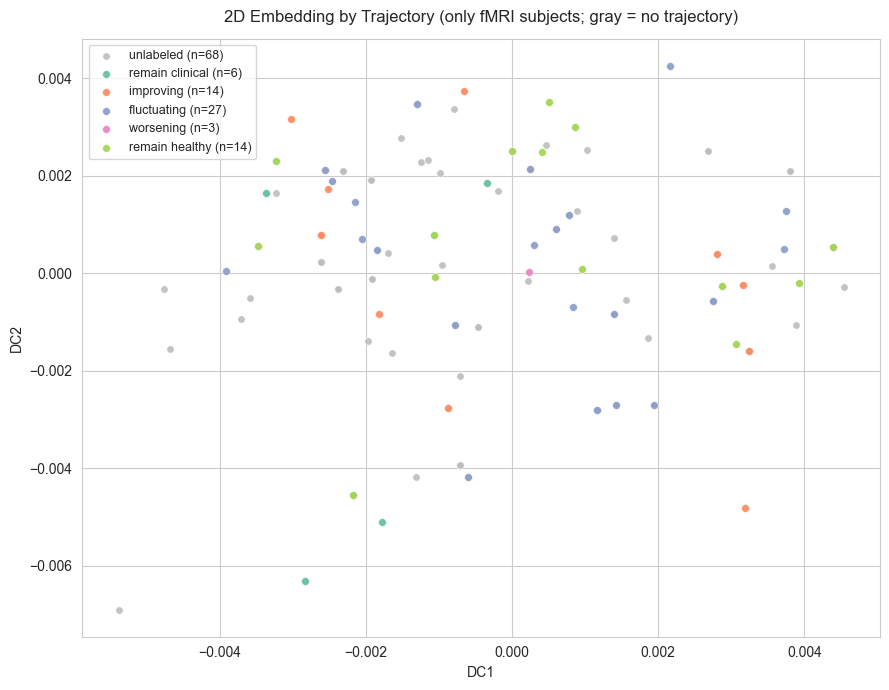

{'total_plotted': 132, 'labeled': 64, 'unlabeled_gray': 68}


AttributeError: 'Legend' object has no attribute 'legendHandles'

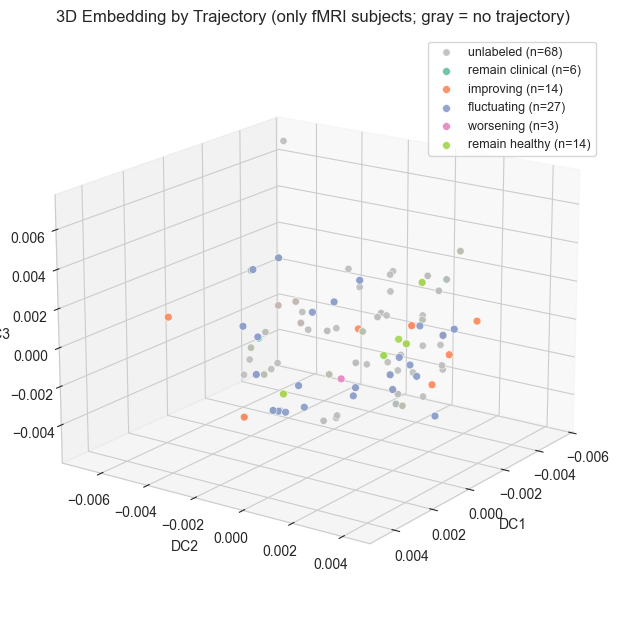

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path

EMB_FILE = Path("data/SCHAEFER_mat_cor/csv_out/diffusion_map_ses1_labeled.csv")
TRAJ_FILE = Path("data/only_Q_outputs/5_timepoints/filtered_merged_data_with_trajectory.csv")

# Allowed trajectory labels (normalized)
TRAJECTORY_ORDER_RAW = ["remain clinical", "improving", "fluctuating", "worsening", "remain healthy"]

# ---------- helpers ----------
def canonical_subject(s):
    s = str(s).lower().strip()
    s = re.sub(r'(ses(sion)?[-_ ]?\d+)$', '', s)
    s = re.sub(r'(session|ses)[-_ ]?\d+', '', s)
    s = re.sub(r'^(sub(ject)?|participant|part|pt|id|case|patient|p|s|sbj)[-_ ]*', '', s)
    s = re.sub(r'[^a-z0-9]+', '', s)
    m = re.findall(r'\d+', s)
    return f"id{int(m[-1])}" if m else (s or "id0")

def norm_label(s):
    if not isinstance(s, str): return ""
    return re.sub(r"[_\s]+", " ", s.strip().lower())

def find_col_contains(df, include_tokens, exclude_tokens=()):
    cols = list(df.columns); low = [c.lower() for c in cols]
    for i, lc in enumerate(low):
        if any(tok in lc for tok in include_tokens) and not any(tok in lc for tok in exclude_tokens):
            return cols[i]
    return None

# Normalize the allowed set once
ALLOWED = {norm_label(x) for x in TRAJECTORY_ORDER_RAW}

# ---------- 1) load embedding (ONLY these subjects will be plotted) ----------
emb = pd.read_csv(EMB_FILE)

subj_col_emb = find_col_contains(emb, ["subject","participant","id","subj","code","case"]) \
               or [c for c in emb.columns if not pd.api.types.is_numeric_dtype(emb[c])][0]
x_col = find_col_contains(emb, ["dm1","dim1","component_1","pc1","tsne1","umap1","x"])
y_col = find_col_contains(emb, ["dm2","dim2","component_2","pc2","tsne2","umap2","y"])
if x_col is None or y_col is None:
    num_cols = [c for c in emb.columns if pd.api.types.is_numeric_dtype(emb[c])]
    x_col, y_col = num_cols[:2]

emb = emb[[subj_col_emb, x_col, y_col]].rename(columns={subj_col_emb:"subject", x_col:"x", y_col:"y"})
emb["canon"] = emb["subject"].map(canonical_subject)
emb = emb.dropna(subset=["x","y"]).drop_duplicates(subset=["canon"])  # keep valid unique rows only

# ---------- 2) load trajectories ----------
meta = pd.read_csv(TRAJ_FILE)
subj_col_meta = find_col_contains(meta, ["subject","participant","id","subj","code","case"])
traj_col_meta = find_col_contains(meta, ["trajectory","traj","class","group","label","kmeans"])
if subj_col_meta is None or traj_col_meta is None:
    raise ValueError(f"Could not locate subject/trajectory columns. Found: {list(meta.columns)}")

meta = meta[[subj_col_meta, traj_col_meta]].rename(columns={subj_col_meta:"subject", traj_col_meta:"trajectory_raw"})
meta["canon"]      = meta["subject"].map(canonical_subject)
meta["trajectory"] = meta["trajectory_raw"].map(norm_label)

# ---------- 3) LEFT merge (keep ONLY embedding subjects) ----------
df = emb.merge(meta[["canon","trajectory"]], on="canon", how="left")

# Any trajectory not in the allowed list becomes NaN → will be plotted gray
df.loc[~df["trajectory"].isin(ALLOWED), "trajectory"] = np.nan

# Build legend order from allowed labels that are actually present
labels_present = [lab for lab in TRAJECTORY_ORDER_RAW if norm_label(lab) in set(df["trajectory"].dropna())]
legend_order = [norm_label(lab) for lab in labels_present]

# Colors (gray for unlabeled)
palette = sns.color_palette("Set2", n_colors=len(legend_order))
lut = dict(zip(legend_order, palette))
GRAY = "#BDBDBD"

# ---------- 4) plot ----------
plt.figure(figsize=(9, 7))

# Unlabeled (gray)
mask_unlab = df["trajectory"].isna()
plt.scatter(df.loc[mask_unlab,"x"], df.loc[mask_unlab,"y"],
            s=28, c=GRAY, edgecolors="white", linewidths=0.4, alpha=0.9, label=f"unlabeled (n={int(mask_unlab.sum())})")

# Labeled groups
for raw_lab in labels_present:
    lab = norm_label(raw_lab)
    m = df["trajectory"] == lab
    if m.any():
        plt.scatter(df.loc[m,"x"], df.loc[m,"y"],
                    s=32, c=[lut[lab]], edgecolors="white", linewidths=0.4, alpha=0.95,
                    label=f"{raw_lab} (n={int(m.sum())})")

plt.xlabel("DC1"); plt.ylabel("DC2")
plt.title("2D Embedding by Trajectory (only fMRI subjects; gray = no trajectory)", pad=12)
leg = plt.legend(frameon=True, fontsize=9, loc="best")


plt.tight_layout()
plt.show()

# Quick counts so you can verify logic:
print({
    "total_plotted": len(df),
    "labeled": int(df["trajectory"].notna().sum()),
    "unlabeled_gray": int(df["trajectory"].isna().sum())
})



ALLOWED = {norm_label(x) for x in TRAJECTORY_ORDER_RAW}

# ---------- 1) load embedding (3D if available) ----------
emb = pd.read_csv(EMB_FILE)

subj_col_emb = find_col_contains(emb, ["subject","participant","id","subj","code","case"]) \
               or [c for c in emb.columns if not pd.api.types.is_numeric_dtype(emb[c])][0]

x_col = find_col_contains(emb, ["dm1","dim1","component_1","pc1","tsne1","umap1","x"])
y_col = find_col_contains(emb, ["dm2","dim2","component_2","pc2","tsne2","umap2","y"])
z_col = find_col_contains(emb, ["dm3","dim3","component_3","pc3","tsne3","umap3","z"])

# fallback: take the first 3 numeric columns if any of x/y/z is missing
if x_col is None or y_col is None or z_col is None:
    num_cols = [c for c in emb.columns if pd.api.types.is_numeric_dtype(emb[c])]
    # keep subject column out of the numeric set if it happens to be numeric-like
    num_cols = [c for c in num_cols if c != subj_col_emb]
    if len(num_cols) < 3:
        raise ValueError("Couldn't find 3 embedding dimensions. Ensure your CSV has three numeric columns (e.g., dm1/dm2/dm3).")
    x_col, y_col, z_col = num_cols[:3]

emb = emb[[subj_col_emb, x_col, y_col, z_col]].rename(
    columns={subj_col_emb:"subject", x_col:"x", y_col:"y", z_col:"z"}
)
emb["canon"] = emb["subject"].map(canonical_subject)
emb = emb.dropna(subset=["x","y","z"]).drop_duplicates(subset=["canon"])

# ---------- 2) load trajectories ----------
meta = pd.read_csv(TRAJ_FILE)
subj_col_meta = find_col_contains(meta, ["subject","participant","id","subj","code","case"])
traj_col_meta = find_col_contains(meta, ["trajectory","traj","class","group","label","kmeans"])
if subj_col_meta is None or traj_col_meta is None:
    raise ValueError(f"Could not locate subject/trajectory columns. Found: {list(meta.columns)}")

meta = meta[[subj_col_meta, traj_col_meta]].rename(columns={subj_col_meta:"subject", traj_col_meta:"trajectory_raw"})
meta["canon"]      = meta["subject"].map(canonical_subject)
meta["trajectory"] = meta["trajectory_raw"].map(norm_label)

# ---------- 3) LEFT merge (only embedding subjects) ----------
df = emb.merge(meta[["canon","trajectory"]], on="canon", how="left")

# invalidate unexpected labels → gray
df.loc[~df["trajectory"].isin(ALLOWED), "trajectory"] = np.nan

# legend order from allowed labels that are present
labels_present = [lab for lab in TRAJECTORY_ORDER_RAW if norm_label(lab) in set(df["trajectory"].dropna())]
legend_order = [norm_label(lab) for lab in labels_present]

# colors
palette = sns.color_palette("Set2", n_colors=len(legend_order))
lut = dict(zip(legend_order, palette))
GRAY = "#BDBDBD"

# ---------- 4) 3D scatter ----------
fig = plt.figure(figsize=(9.5, 7.5))
ax = fig.add_subplot(111, projection="3d")

# unlabeled first (gray)
mask_unlab = df["trajectory"].isna()
ax.scatter(df.loc[mask_unlab, "x"],
           df.loc[mask_unlab, "y"],
           df.loc[mask_unlab, "z"],
           s=28, c=GRAY, edgecolors="white", linewidths=0.4, alpha=0.9, label=f"unlabeled (n={int(mask_unlab.sum())})")

# labeled groups
for raw_lab in labels_present:
    lab = norm_label(raw_lab)
    m = df["trajectory"] == lab
    if m.any():
        ax.scatter(df.loc[m, "x"], df.loc[m, "y"], df.loc[m, "z"],
                   s=32, c=[lut[lab]], edgecolors="white", linewidths=0.4, alpha=0.95,
                   label=f"{raw_lab} (n={int(m.sum())})")

ax.set_xlabel("DC1")
ax.set_ylabel("DC2")
ax.set_zlabel("DC3")
ax.set_title("3D Embedding by Trajectory (only fMRI subjects; gray = no trajectory)", pad=10)

# view angle (tweak if you like)
ax.view_init(elev=18, azim=35)

# nice legend
leg = ax.legend(frameon=True, fontsize=9, loc="best")
for lh in leg.legendHandles:
    try: lh.set_linewidth(0.6)
    except Exception: pass

plt.tight_layout()
plt.show()

print({
    "total_plotted": len(df),
    "labeled": int(df["trajectory"].notna().sum()),
    "unlabeled_gray": int(df["trajectory"].isna().sum())
})

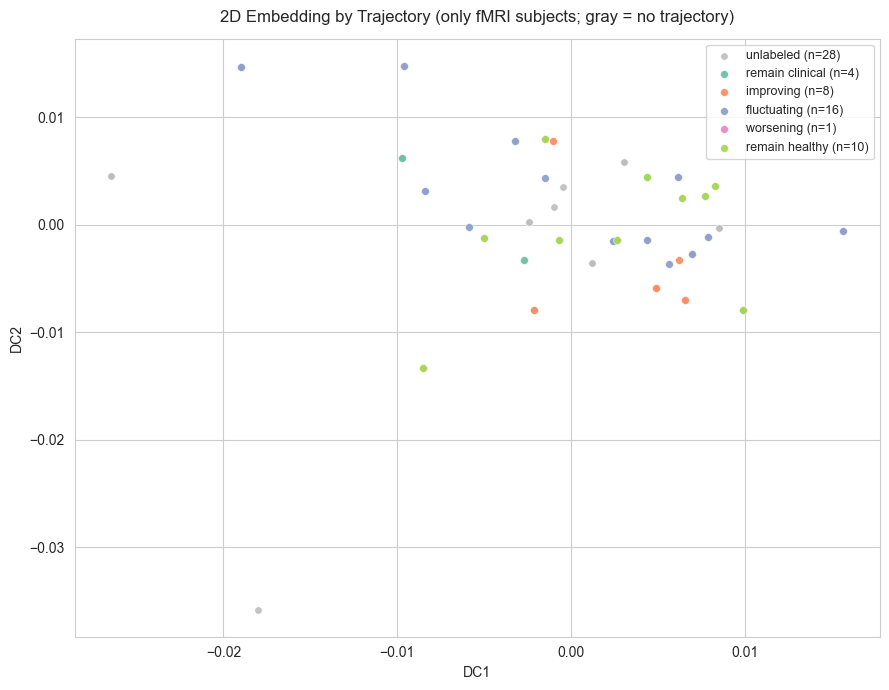

{'total_plotted': 67, 'labeled': 39, 'unlabeled_gray': 28}


AttributeError: 'Legend' object has no attribute 'legendHandles'

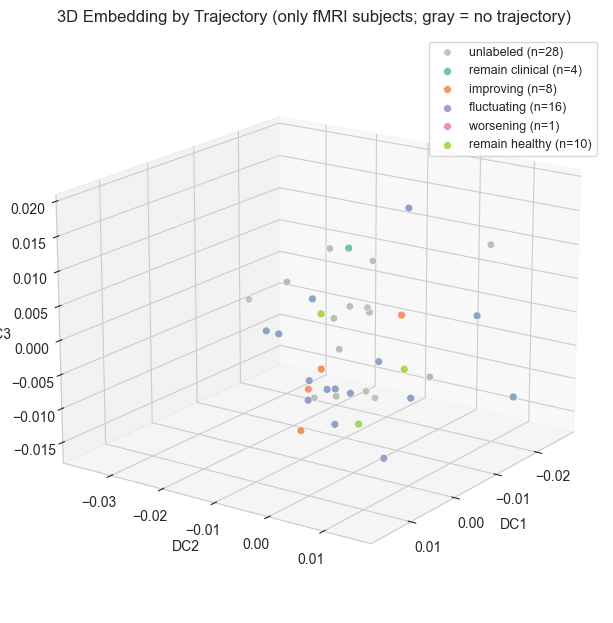

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path

EMB_FILE = Path("data/SCHAEFER_mat_cor/csv_out/diffusion_map_ses2_labeled.csv")
TRAJ_FILE = Path("data/only_Q_outputs/5_timepoints/filtered_merged_data_with_trajectory.csv")

# Allowed trajectory labels (normalized)
TRAJECTORY_ORDER_RAW = ["remain clinical", "improving", "fluctuating", "worsening", "remain healthy"]

# ---------- helpers ----------
def canonical_subject(s):
    s = str(s).lower().strip()
    s = re.sub(r'(ses(sion)?[-_ ]?\d+)$', '', s)
    s = re.sub(r'(session|ses)[-_ ]?\d+', '', s)
    s = re.sub(r'^(sub(ject)?|participant|part|pt|id|case|patient|p|s|sbj)[-_ ]*', '', s)
    s = re.sub(r'[^a-z0-9]+', '', s)
    m = re.findall(r'\d+', s)
    return f"id{int(m[-1])}" if m else (s or "id0")

def norm_label(s):
    if not isinstance(s, str): return ""
    return re.sub(r"[_\s]+", " ", s.strip().lower())

def find_col_contains(df, include_tokens, exclude_tokens=()):
    cols = list(df.columns); low = [c.lower() for c in cols]
    for i, lc in enumerate(low):
        if any(tok in lc for tok in include_tokens) and not any(tok in lc for tok in exclude_tokens):
            return cols[i]
    return None

# Normalize the allowed set once
ALLOWED = {norm_label(x) for x in TRAJECTORY_ORDER_RAW}

# ---------- 1) load embedding (ONLY these subjects will be plotted) ----------
emb = pd.read_csv(EMB_FILE)

subj_col_emb = find_col_contains(emb, ["subject","participant","id","subj","code","case"]) \
               or [c for c in emb.columns if not pd.api.types.is_numeric_dtype(emb[c])][0]
x_col = find_col_contains(emb, ["dm1","dim1","component_1","pc1","tsne1","umap1","x"])
y_col = find_col_contains(emb, ["dm2","dim2","component_2","pc2","tsne2","umap2","y"])
if x_col is None or y_col is None:
    num_cols = [c for c in emb.columns if pd.api.types.is_numeric_dtype(emb[c])]
    x_col, y_col = num_cols[:2]

emb = emb[[subj_col_emb, x_col, y_col]].rename(columns={subj_col_emb:"subject", x_col:"x", y_col:"y"})
emb["canon"] = emb["subject"].map(canonical_subject)
emb = emb.dropna(subset=["x","y"]).drop_duplicates(subset=["canon"])  # keep valid unique rows only

# ---------- 2) load trajectories ----------
meta = pd.read_csv(TRAJ_FILE)
subj_col_meta = find_col_contains(meta, ["subject","participant","id","subj","code","case"])
traj_col_meta = find_col_contains(meta, ["trajectory","traj","class","group","label","kmeans"])
if subj_col_meta is None or traj_col_meta is None:
    raise ValueError(f"Could not locate subject/trajectory columns. Found: {list(meta.columns)}")

meta = meta[[subj_col_meta, traj_col_meta]].rename(columns={subj_col_meta:"subject", traj_col_meta:"trajectory_raw"})
meta["canon"]      = meta["subject"].map(canonical_subject)
meta["trajectory"] = meta["trajectory_raw"].map(norm_label)

# ---------- 3) LEFT merge (keep ONLY embedding subjects) ----------
df = emb.merge(meta[["canon","trajectory"]], on="canon", how="left")

# Any trajectory not in the allowed list becomes NaN → will be plotted gray
df.loc[~df["trajectory"].isin(ALLOWED), "trajectory"] = np.nan

# Build legend order from allowed labels that are actually present
labels_present = [lab for lab in TRAJECTORY_ORDER_RAW if norm_label(lab) in set(df["trajectory"].dropna())]
legend_order = [norm_label(lab) for lab in labels_present]

# Colors (gray for unlabeled)
palette = sns.color_palette("Set2", n_colors=len(legend_order))
lut = dict(zip(legend_order, palette))
GRAY = "#BDBDBD"

# ---------- 4) plot ----------
plt.figure(figsize=(9, 7))

# Unlabeled (gray)
mask_unlab = df["trajectory"].isna()
plt.scatter(df.loc[mask_unlab,"x"], df.loc[mask_unlab,"y"],
            s=28, c=GRAY, edgecolors="white", linewidths=0.4, alpha=0.9, label=f"unlabeled (n={int(mask_unlab.sum())})")

# Labeled groups
for raw_lab in labels_present:
    lab = norm_label(raw_lab)
    m = df["trajectory"] == lab
    if m.any():
        plt.scatter(df.loc[m,"x"], df.loc[m,"y"],
                    s=32, c=[lut[lab]], edgecolors="white", linewidths=0.4, alpha=0.95,
                    label=f"{raw_lab} (n={int(m.sum())})")

plt.xlabel("DC1"); plt.ylabel("DC2")
plt.title("2D Embedding by Trajectory (only fMRI subjects; gray = no trajectory)", pad=12)
leg = plt.legend(frameon=True, fontsize=9, loc="best")


plt.tight_layout()
plt.show()

# Quick counts so you can verify logic:
print({
    "total_plotted": len(df),
    "labeled": int(df["trajectory"].notna().sum()),
    "unlabeled_gray": int(df["trajectory"].isna().sum())
})


ALLOWED = {norm_label(x) for x in TRAJECTORY_ORDER_RAW}

# ---------- 1) load embedding (3D if available) ----------
emb = pd.read_csv(EMB_FILE)

subj_col_emb = find_col_contains(emb, ["subject","participant","id","subj","code","case"]) \
               or [c for c in emb.columns if not pd.api.types.is_numeric_dtype(emb[c])][0]

x_col = find_col_contains(emb, ["dm1","dim1","component_1","pc1","tsne1","umap1","x"])
y_col = find_col_contains(emb, ["dm2","dim2","component_2","pc2","tsne2","umap2","y"])
z_col = find_col_contains(emb, ["dm3","dim3","component_3","pc3","tsne3","umap3","z"])

# fallback: take the first 3 numeric columns if any of x/y/z is missing
if x_col is None or y_col is None or z_col is None:
    num_cols = [c for c in emb.columns if pd.api.types.is_numeric_dtype(emb[c])]
    # keep subject column out of the numeric set if it happens to be numeric-like
    num_cols = [c for c in num_cols if c != subj_col_emb]
    if len(num_cols) < 3:
        raise ValueError("Couldn't find 3 embedding dimensions. Ensure your CSV has three numeric columns (e.g., dm1/dm2/dm3).")
    x_col, y_col, z_col = num_cols[:3]

emb = emb[[subj_col_emb, x_col, y_col, z_col]].rename(
    columns={subj_col_emb:"subject", x_col:"x", y_col:"y", z_col:"z"}
)
emb["canon"] = emb["subject"].map(canonical_subject)
emb = emb.dropna(subset=["x","y","z"]).drop_duplicates(subset=["canon"])

# ---------- 2) load trajectories ----------
meta = pd.read_csv(TRAJ_FILE)
subj_col_meta = find_col_contains(meta, ["subject","participant","id","subj","code","case"])
traj_col_meta = find_col_contains(meta, ["trajectory","traj","class","group","label","kmeans"])
if subj_col_meta is None or traj_col_meta is None:
    raise ValueError(f"Could not locate subject/trajectory columns. Found: {list(meta.columns)}")

meta = meta[[subj_col_meta, traj_col_meta]].rename(columns={subj_col_meta:"subject", traj_col_meta:"trajectory_raw"})
meta["canon"]      = meta["subject"].map(canonical_subject)
meta["trajectory"] = meta["trajectory_raw"].map(norm_label)

# ---------- 3) LEFT merge (only embedding subjects) ----------
df = emb.merge(meta[["canon","trajectory"]], on="canon", how="left")

# invalidate unexpected labels → gray
df.loc[~df["trajectory"].isin(ALLOWED), "trajectory"] = np.nan

# legend order from allowed labels that are present
labels_present = [lab for lab in TRAJECTORY_ORDER_RAW if norm_label(lab) in set(df["trajectory"].dropna())]
legend_order = [norm_label(lab) for lab in labels_present]

# colors
palette = sns.color_palette("Set2", n_colors=len(legend_order))
lut = dict(zip(legend_order, palette))
GRAY = "#BDBDBD"

# ---------- 4) 3D scatter ----------
fig = plt.figure(figsize=(9.5, 7.5))
ax = fig.add_subplot(111, projection="3d")

# unlabeled first (gray)
mask_unlab = df["trajectory"].isna()
ax.scatter(df.loc[mask_unlab, "x"],
           df.loc[mask_unlab, "y"],
           df.loc[mask_unlab, "z"],
           s=28, c=GRAY, edgecolors="white", linewidths=0.4, alpha=0.9, label=f"unlabeled (n={int(mask_unlab.sum())})")

# labeled groups
for raw_lab in labels_present:
    lab = norm_label(raw_lab)
    m = df["trajectory"] == lab
    if m.any():
        ax.scatter(df.loc[m, "x"], df.loc[m, "y"], df.loc[m, "z"],
                   s=32, c=[lut[lab]], edgecolors="white", linewidths=0.4, alpha=0.95,
                   label=f"{raw_lab} (n={int(m.sum())})")

ax.set_xlabel("DC1")
ax.set_ylabel("DC2")
ax.set_zlabel("DC3")
ax.set_title("3D Embedding by Trajectory (only fMRI subjects; gray = no trajectory)", pad=10)

# view angle (tweak if you like)
ax.view_init(elev=18, azim=35)

# nice legend
leg = ax.legend(frameon=True, fontsize=9, loc="best")
for lh in leg.legendHandles:
    try: lh.set_linewidth(0.6)
    except Exception: pass

plt.tight_layout()
plt.show()

print({
    "total_plotted": len(df),
    "labeled": int(df["trajectory"].notna().sum()),
    "unlabeled_gray": int(df["trajectory"].isna().sum())
})


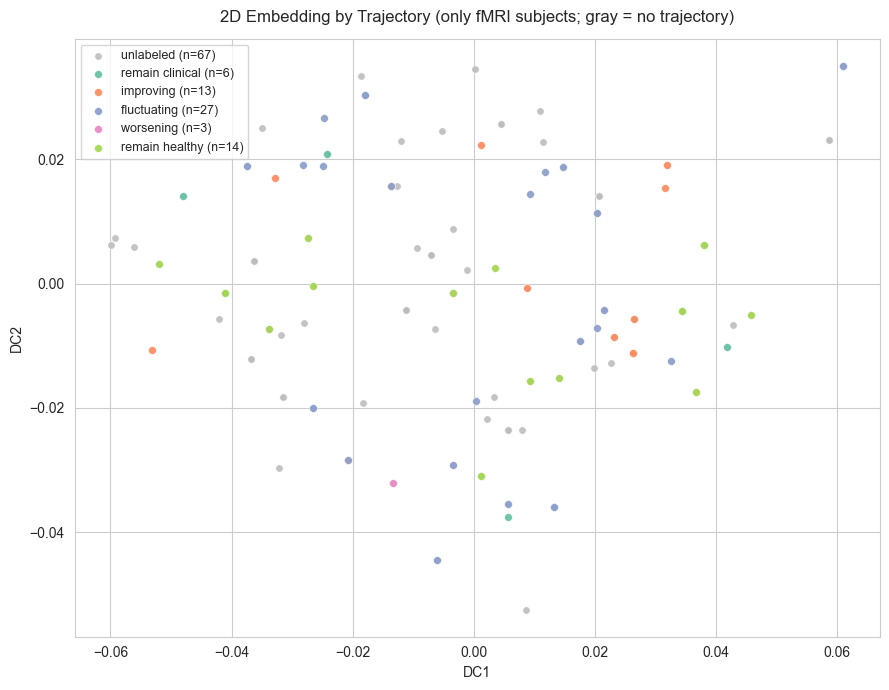

{'total_plotted': 130, 'labeled': 63, 'unlabeled_gray': 67}


AttributeError: 'Legend' object has no attribute 'legendHandles'

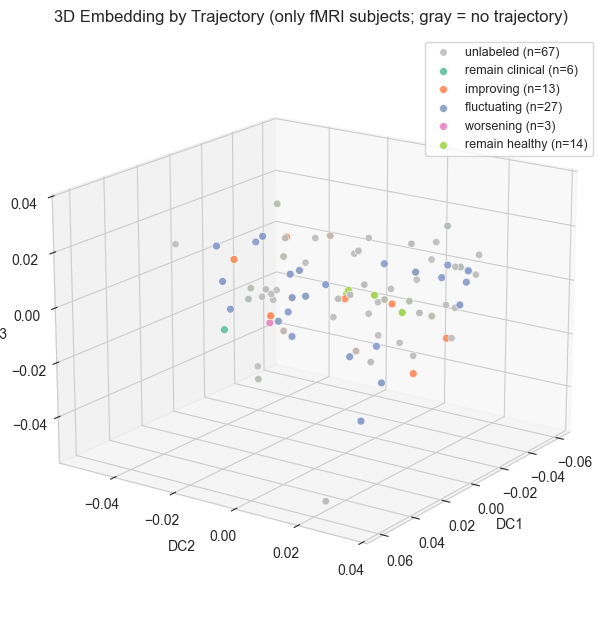

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path

EMB_FILE  = Path("data/YEO_mat_cor/YEO_mat_cor/csv_out/diffusion_map_ses1_labeled_YEO.csv")
TRAJ_FILE = Path("data/only_Q_outputs/5_timepoints/filtered_merged_data_with_trajectory.csv")

# Allowed trajectory labels (normalized)
TRAJECTORY_ORDER_RAW = ["remain clinical", "improving", "fluctuating", "worsening", "remain healthy"]

# ---------- helpers ----------
def canonical_subject(s):
    s = str(s).lower().strip()
    s = re.sub(r'(ses(sion)?[-_ ]?\d+)$', '', s)
    s = re.sub(r'(session|ses)[-_ ]?\d+', '', s)
    s = re.sub(r'^(sub(ject)?|participant|part|pt|id|case|patient|p|s|sbj)[-_ ]*', '', s)
    s = re.sub(r'[^a-z0-9]+', '', s)
    m = re.findall(r'\d+', s)
    return f"id{int(m[-1])}" if m else (s or "id0")

def norm_label(s):
    if not isinstance(s, str): return ""
    return re.sub(r"[_\s]+", " ", s.strip().lower())

def find_col_contains(df, include_tokens, exclude_tokens=()):
    cols = list(df.columns); low = [c.lower() for c in cols]
    for i, lc in enumerate(low):
        if any(tok in lc for tok in include_tokens) and not any(tok in lc for tok in exclude_tokens):
            return cols[i]
    return None

# Normalize the allowed set once
ALLOWED = {norm_label(x) for x in TRAJECTORY_ORDER_RAW}

# ---------- 1) load embedding (ONLY these subjects will be plotted) ----------
emb = pd.read_csv(EMB_FILE)

subj_col_emb = find_col_contains(emb, ["subject","participant","id","subj","code","case"]) \
               or [c for c in emb.columns if not pd.api.types.is_numeric_dtype(emb[c])][0]
x_col = find_col_contains(emb, ["dm1","dim1","component_1","pc1","tsne1","umap1","x"])
y_col = find_col_contains(emb, ["dm2","dim2","component_2","pc2","tsne2","umap2","y"])
if x_col is None or y_col is None:
    num_cols = [c for c in emb.columns if pd.api.types.is_numeric_dtype(emb[c])]
    x_col, y_col = num_cols[:2]

emb = emb[[subj_col_emb, x_col, y_col]].rename(columns={subj_col_emb:"subject", x_col:"x", y_col:"y"})
emb["canon"] = emb["subject"].map(canonical_subject)
emb = emb.dropna(subset=["x","y"]).drop_duplicates(subset=["canon"])  # keep valid unique rows only

# ---------- 2) load trajectories ----------
meta = pd.read_csv(TRAJ_FILE)
subj_col_meta = find_col_contains(meta, ["subject","participant","id","subj","code","case"])
traj_col_meta = find_col_contains(meta, ["trajectory","traj","class","group","label","kmeans"])
if subj_col_meta is None or traj_col_meta is None:
    raise ValueError(f"Could not locate subject/trajectory columns. Found: {list(meta.columns)}")

meta = meta[[subj_col_meta, traj_col_meta]].rename(columns={subj_col_meta:"subject", traj_col_meta:"trajectory_raw"})
meta["canon"]      = meta["subject"].map(canonical_subject)
meta["trajectory"] = meta["trajectory_raw"].map(norm_label)

# ---------- 3) LEFT merge (keep ONLY embedding subjects) ----------
df = emb.merge(meta[["canon","trajectory"]], on="canon", how="left")

# Any trajectory not in the allowed list becomes NaN → will be plotted gray
df.loc[~df["trajectory"].isin(ALLOWED), "trajectory"] = np.nan

# Build legend order from allowed labels that are actually present
labels_present = [lab for lab in TRAJECTORY_ORDER_RAW if norm_label(lab) in set(df["trajectory"].dropna())]
legend_order = [norm_label(lab) for lab in labels_present]

# Colors (gray for unlabeled)
palette = sns.color_palette("Set2", n_colors=len(legend_order))
lut = dict(zip(legend_order, palette))
GRAY = "#BDBDBD"

# ---------- 4) plot ----------
plt.figure(figsize=(9, 7))

# Unlabeled (gray)
mask_unlab = df["trajectory"].isna()
plt.scatter(df.loc[mask_unlab,"x"], df.loc[mask_unlab,"y"],
            s=28, c=GRAY, edgecolors="white", linewidths=0.4, alpha=0.9, label=f"unlabeled (n={int(mask_unlab.sum())})")

# Labeled groups
for raw_lab in labels_present:
    lab = norm_label(raw_lab)
    m = df["trajectory"] == lab
    if m.any():
        plt.scatter(df.loc[m,"x"], df.loc[m,"y"],
                    s=32, c=[lut[lab]], edgecolors="white", linewidths=0.4, alpha=0.95,
                    label=f"{raw_lab} (n={int(m.sum())})")

plt.xlabel("DC1"); plt.ylabel("DC2")
plt.title("2D Embedding by Trajectory (only fMRI subjects; gray = no trajectory)", pad=12)
leg = plt.legend(frameon=True, fontsize=9, loc="best")

plt.tight_layout()
plt.show()

# Quick counts so you can verify logic:
print({
    "total_plotted": len(df),
    "labeled": int(df["trajectory"].notna().sum()),
    "unlabeled_gray": int(df["trajectory"].isna().sum())
})

ALLOWED = {norm_label(x) for x in TRAJECTORY_ORDER_RAW}

# ---------- 1) load embedding (3D if available) ----------
emb = pd.read_csv(EMB_FILE)

subj_col_emb = find_col_contains(emb, ["subject","participant","id","subj","code","case"]) \
               or [c for c in emb.columns if not pd.api.types.is_numeric_dtype(emb[c])][0]

x_col = find_col_contains(emb, ["dm1","dim1","component_1","pc1","tsne1","umap1","x"])
y_col = find_col_contains(emb, ["dm2","dim2","component_2","pc2","tsne2","umap2","y"])
z_col = find_col_contains(emb, ["dm3","dim3","component_3","pc3","tsne3","umap3","z"])

# fallback: take the first 3 numeric columns if any of x/y/z is missing
if x_col is None or y_col is None or z_col is None:
    num_cols = [c for c in emb.columns if pd.api.types.is_numeric_dtype(emb[c])]
    # keep subject column out of the numeric set if it happens to be numeric-like
    num_cols = [c for c in num_cols if c != subj_col_emb]
    if len(num_cols) < 3:
        raise ValueError("Couldn't find 3 embedding dimensions. Ensure your CSV has three numeric columns (e.g., dm1/dm2/dm3).")
    x_col, y_col, z_col = num_cols[:3]

emb = emb[[subj_col_emb, x_col, y_col, z_col]].rename(
    columns={subj_col_emb:"subject", x_col:"x", y_col:"y", z_col:"z"}
)
emb["canon"] = emb["subject"].map(canonical_subject)
emb = emb.dropna(subset=["x","y","z"]).drop_duplicates(subset=["canon"])

# ---------- 2) load trajectories ----------
meta = pd.read_csv(TRAJ_FILE)
subj_col_meta = find_col_contains(meta, ["subject","participant","id","subj","code","case"])
traj_col_meta = find_col_contains(meta, ["trajectory","traj","class","group","label","kmeans"])
if subj_col_meta is None or traj_col_meta is None:
    raise ValueError(f"Could not locate subject/trajectory columns. Found: {list(meta.columns)}")

meta = meta[[subj_col_meta, traj_col_meta]].rename(columns={subj_col_meta:"subject", traj_col_meta:"trajectory_raw"})
meta["canon"]      = meta["subject"].map(canonical_subject)
meta["trajectory"] = meta["trajectory_raw"].map(norm_label)

# ---------- 3) LEFT merge (only embedding subjects) ----------
df = emb.merge(meta[["canon","trajectory"]], on="canon", how="left")

# invalidate unexpected labels → gray
df.loc[~df["trajectory"].isin(ALLOWED), "trajectory"] = np.nan

# legend order from allowed labels that are present
labels_present = [lab for lab in TRAJECTORY_ORDER_RAW if norm_label(lab) in set(df["trajectory"].dropna())]
legend_order = [norm_label(lab) for lab in labels_present]

# colors
palette = sns.color_palette("Set2", n_colors=len(legend_order))
lut = dict(zip(legend_order, palette))
GRAY = "#BDBDBD"

# ---------- 4) 3D scatter ----------
fig = plt.figure(figsize=(9.5, 7.5))
ax = fig.add_subplot(111, projection="3d")

# unlabeled first (gray)
mask_unlab = df["trajectory"].isna()
ax.scatter(df.loc[mask_unlab, "x"],
           df.loc[mask_unlab, "y"],
           df.loc[mask_unlab, "z"],
           s=28, c=GRAY, edgecolors="white", linewidths=0.4, alpha=0.9, label=f"unlabeled (n={int(mask_unlab.sum())})")

# labeled groups
for raw_lab in labels_present:
    lab = norm_label(raw_lab)
    m = df["trajectory"] == lab
    if m.any():
        ax.scatter(df.loc[m, "x"], df.loc[m, "y"], df.loc[m, "z"],
                   s=32, c=[lut[lab]], edgecolors="white", linewidths=0.4, alpha=0.95,
                   label=f"{raw_lab} (n={int(m.sum())})")

ax.set_xlabel("DC1")
ax.set_ylabel("DC2")
ax.set_zlabel("DC3")
ax.set_title("3D Embedding by Trajectory (only fMRI subjects; gray = no trajectory)", pad=10)

# view angle (tweak if you like)
ax.view_init(elev=18, azim=35)

# nice legend
leg = ax.legend(frameon=True, fontsize=9, loc="best")
for lh in leg.legendHandles:
    try: lh.set_linewidth(0.6)
    except Exception: pass

plt.tight_layout()
plt.show()

print({
    "total_plotted": len(df),
    "labeled": int(df["trajectory"].notna().sum()),
    "unlabeled_gray": int(df["trajectory"].isna().sum())
})

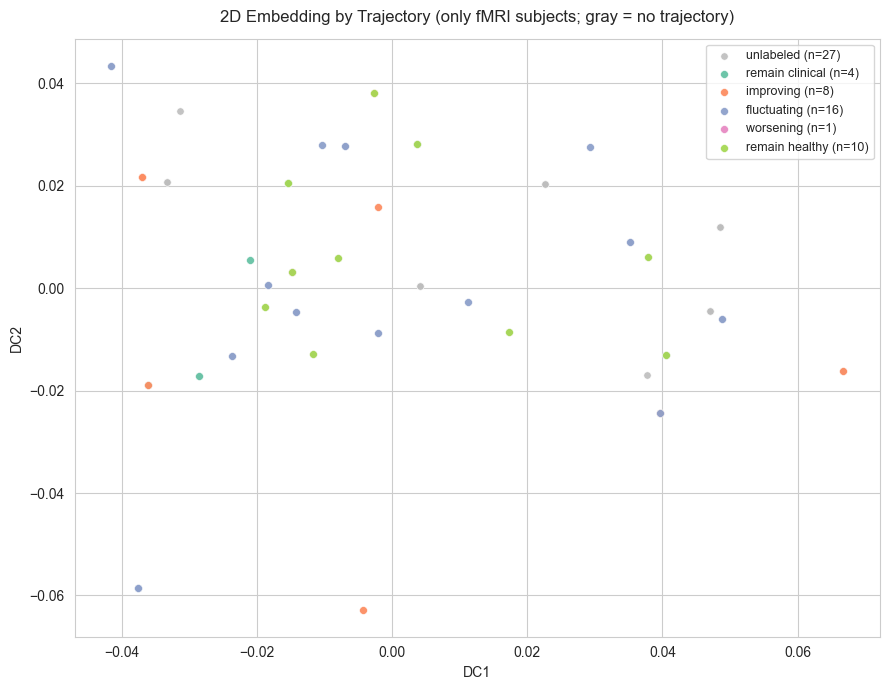

{'total_plotted': 66, 'labeled': 39, 'unlabeled_gray': 27}


AttributeError: 'Legend' object has no attribute 'legendHandles'

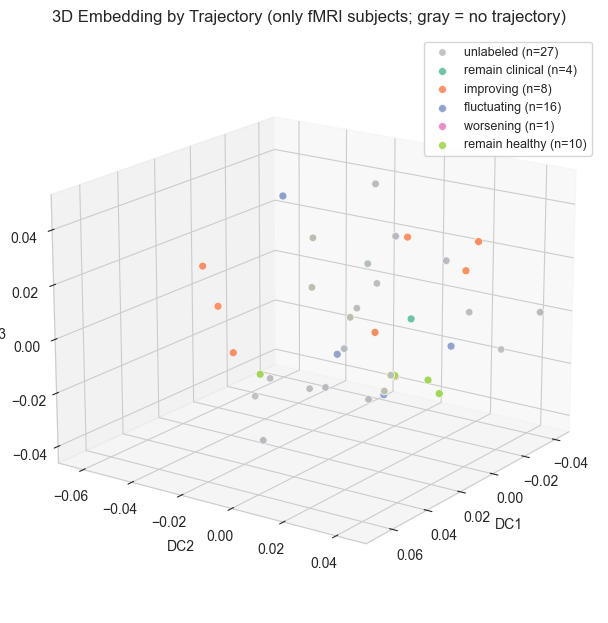

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path

EMB_FILE  = Path("data/YEO_mat_cor/YEO_mat_cor/csv_out/diffusion_map_ses2_labeled_YEO.csv")
TRAJ_FILE = Path("data/only_Q_outputs/5_timepoints/filtered_merged_data_with_trajectory.csv")

# Allowed trajectory labels (normalized)
TRAJECTORY_ORDER_RAW = ["remain clinical", "improving", "fluctuating", "worsening", "remain healthy"]

# ---------- helpers ----------
def canonical_subject(s):
    s = str(s).lower().strip()
    s = re.sub(r'(ses(sion)?[-_ ]?\d+)$', '', s)
    s = re.sub(r'(session|ses)[-_ ]?\d+', '', s)
    s = re.sub(r'^(sub(ject)?|participant|part|pt|id|case|patient|p|s|sbj)[-_ ]*', '', s)
    s = re.sub(r'[^a-z0-9]+', '', s)
    m = re.findall(r'\d+', s)
    return f"id{int(m[-1])}" if m else (s or "id0")

def norm_label(s):
    if not isinstance(s, str): return ""
    return re.sub(r"[_\s]+", " ", s.strip().lower())

def find_col_contains(df, include_tokens, exclude_tokens=()):
    cols = list(df.columns); low = [c.lower() for c in cols]
    for i, lc in enumerate(low):
        if any(tok in lc for tok in include_tokens) and not any(tok in lc for tok in exclude_tokens):
            return cols[i]
    return None

# Normalize the allowed set once
ALLOWED = {norm_label(x) for x in TRAJECTORY_ORDER_RAW}

# ---------- 1) load embedding (ONLY these subjects will be plotted) ----------
emb = pd.read_csv(EMB_FILE)

subj_col_emb = find_col_contains(emb, ["subject","participant","id","subj","code","case"]) \
               or [c for c in emb.columns if not pd.api.types.is_numeric_dtype(emb[c])][0]
x_col = find_col_contains(emb, ["dm1","dim1","component_1","pc1","tsne1","umap1","x"])
y_col = find_col_contains(emb, ["dm2","dim2","component_2","pc2","tsne2","umap2","y"])
if x_col is None or y_col is None:
    num_cols = [c for c in emb.columns if pd.api.types.is_numeric_dtype(emb[c])]
    x_col, y_col = num_cols[:2]

emb = emb[[subj_col_emb, x_col, y_col]].rename(columns={subj_col_emb:"subject", x_col:"x", y_col:"y"})
emb["canon"] = emb["subject"].map(canonical_subject)
emb = emb.dropna(subset=["x","y"]).drop_duplicates(subset=["canon"])  # keep valid unique rows only

# ---------- 2) load trajectories ----------
meta = pd.read_csv(TRAJ_FILE)
subj_col_meta = find_col_contains(meta, ["subject","participant","id","subj","code","case"])
traj_col_meta = find_col_contains(meta, ["trajectory","traj","class","group","label","kmeans"])
if subj_col_meta is None or traj_col_meta is None:
    raise ValueError(f"Could not locate subject/trajectory columns. Found: {list(meta.columns)}")

meta = meta[[subj_col_meta, traj_col_meta]].rename(columns={subj_col_meta:"subject", traj_col_meta:"trajectory_raw"})
meta["canon"]      = meta["subject"].map(canonical_subject)
meta["trajectory"] = meta["trajectory_raw"].map(norm_label)

# ---------- 3) LEFT merge (keep ONLY embedding subjects) ----------
df = emb.merge(meta[["canon","trajectory"]], on="canon", how="left")

# Any trajectory not in the allowed list becomes NaN → will be plotted gray
df.loc[~df["trajectory"].isin(ALLOWED), "trajectory"] = np.nan

# Build legend order from allowed labels that are actually present
labels_present = [lab for lab in TRAJECTORY_ORDER_RAW if norm_label(lab) in set(df["trajectory"].dropna())]
legend_order = [norm_label(lab) for lab in labels_present]

# Colors (gray for unlabeled)
palette = sns.color_palette("Set2", n_colors=len(legend_order))
lut = dict(zip(legend_order, palette))
GRAY = "#BDBDBD"

# ---------- 4) plot ----------
plt.figure(figsize=(9, 7))

# Unlabeled (gray)
mask_unlab = df["trajectory"].isna()
plt.scatter(df.loc[mask_unlab,"x"], df.loc[mask_unlab,"y"],
            s=28, c=GRAY, edgecolors="white", linewidths=0.4, alpha=0.9, label=f"unlabeled (n={int(mask_unlab.sum())})")

# Labeled groups
for raw_lab in labels_present:
    lab = norm_label(raw_lab)
    m = df["trajectory"] == lab
    if m.any():
        plt.scatter(df.loc[m,"x"], df.loc[m,"y"],
                    s=32, c=[lut[lab]], edgecolors="white", linewidths=0.4, alpha=0.95,
                    label=f"{raw_lab} (n={int(m.sum())})")

plt.xlabel("DC1"); plt.ylabel("DC2")
plt.title("2D Embedding by Trajectory (only fMRI subjects; gray = no trajectory)", pad=12)
leg = plt.legend(frameon=True, fontsize=9, loc="best")


plt.tight_layout()
plt.show()

# Quick counts so you can verify logic:
print({
    "total_plotted": len(df),
    "labeled": int(df["trajectory"].notna().sum()),
    "unlabeled_gray": int(df["trajectory"].isna().sum())
})

ALLOWED = {norm_label(x) for x in TRAJECTORY_ORDER_RAW}

# ---------- 1) load embedding (3D if available) ----------
emb = pd.read_csv(EMB_FILE)

subj_col_emb = find_col_contains(emb, ["subject","participant","id","subj","code","case"]) \
               or [c for c in emb.columns if not pd.api.types.is_numeric_dtype(emb[c])][0]

x_col = find_col_contains(emb, ["dm1","dim1","component_1","pc1","tsne1","umap1","x"])
y_col = find_col_contains(emb, ["dm2","dim2","component_2","pc2","tsne2","umap2","y"])
z_col = find_col_contains(emb, ["dm3","dim3","component_3","pc3","tsne3","umap3","z"])

# fallback: take the first 3 numeric columns if any of x/y/z is missing
if x_col is None or y_col is None or z_col is None:
    num_cols = [c for c in emb.columns if pd.api.types.is_numeric_dtype(emb[c])]
    # keep subject column out of the numeric set if it happens to be numeric-like
    num_cols = [c for c in num_cols if c != subj_col_emb]
    if len(num_cols) < 3:
        raise ValueError("Couldn't find 3 embedding dimensions. Ensure your CSV has three numeric columns (e.g., dm1/dm2/dm3).")
    x_col, y_col, z_col = num_cols[:3]

emb = emb[[subj_col_emb, x_col, y_col, z_col]].rename(
    columns={subj_col_emb:"subject", x_col:"x", y_col:"y", z_col:"z"}
)
emb["canon"] = emb["subject"].map(canonical_subject)
emb = emb.dropna(subset=["x","y","z"]).drop_duplicates(subset=["canon"])

# ---------- 2) load trajectories ----------
meta = pd.read_csv(TRAJ_FILE)
subj_col_meta = find_col_contains(meta, ["subject","participant","id","subj","code","case"])
traj_col_meta = find_col_contains(meta, ["trajectory","traj","class","group","label","kmeans"])
if subj_col_meta is None or traj_col_meta is None:
    raise ValueError(f"Could not locate subject/trajectory columns. Found: {list(meta.columns)}")

meta = meta[[subj_col_meta, traj_col_meta]].rename(columns={subj_col_meta:"subject", traj_col_meta:"trajectory_raw"})
meta["canon"]      = meta["subject"].map(canonical_subject)
meta["trajectory"] = meta["trajectory_raw"].map(norm_label)

# ---------- 3) LEFT merge (only embedding subjects) ----------
df = emb.merge(meta[["canon","trajectory"]], on="canon", how="left")

# invalidate unexpected labels → gray
df.loc[~df["trajectory"].isin(ALLOWED), "trajectory"] = np.nan

# legend order from allowed labels that are present
labels_present = [lab for lab in TRAJECTORY_ORDER_RAW if norm_label(lab) in set(df["trajectory"].dropna())]
legend_order = [norm_label(lab) for lab in labels_present]

# colors
palette = sns.color_palette("Set2", n_colors=len(legend_order))
lut = dict(zip(legend_order, palette))
GRAY = "#BDBDBD"

# ---------- 4) 3D scatter ----------
fig = plt.figure(figsize=(9.5, 7.5))
ax = fig.add_subplot(111, projection="3d")

# unlabeled first (gray)
mask_unlab = df["trajectory"].isna()
ax.scatter(df.loc[mask_unlab, "x"],
           df.loc[mask_unlab, "y"],
           df.loc[mask_unlab, "z"],
           s=28, c=GRAY, edgecolors="white", linewidths=0.4, alpha=0.9, label=f"unlabeled (n={int(mask_unlab.sum())})")

# labeled groups
for raw_lab in labels_present:
    lab = norm_label(raw_lab)
    m = df["trajectory"] == lab
    if m.any():
        ax.scatter(df.loc[m, "x"], df.loc[m, "y"], df.loc[m, "z"],
                   s=32, c=[lut[lab]], edgecolors="white", linewidths=0.4, alpha=0.95,
                   label=f"{raw_lab} (n={int(m.sum())})")

ax.set_xlabel("DC1")
ax.set_ylabel("DC2")
ax.set_zlabel("DC3")
ax.set_title("3D Embedding by Trajectory (only fMRI subjects; gray = no trajectory)", pad=10)

# view angle (tweak if you like)
ax.view_init(elev=18, azim=35)

# nice legend
leg = ax.legend(frameon=True, fontsize=9, loc="best")
for lh in leg.legendHandles:
    try: lh.set_linewidth(0.6)
    except Exception: pass

plt.tight_layout()
plt.show()

print({
    "total_plotted": len(df),
    "labeled": int(df["trajectory"].notna().sum()),
    "unlabeled_gray": int(df["trajectory"].isna().sum())
})
